# Build models for 1h-6h (NN model)
# RMSE=f($\sigma( \Delta k_c)$)

# Read file that contains the timeseries results
# and build a linear regression model
# compute the 95% uncertainty interval

In [94]:
import pandas as pd

# Load the RMSE results obtained by the NN models for the 60 sites
file_path = '../data/results_id.csv'
data = pd.read_csv(file_path)

# List of the columns to process - columns N1 to N6 contains the NN RMSE predictions
# columns P1 to P6 : Persistence RMSE predictions ; 
# A1 to A6 : Linear AR RMSE predictions
columns_to_process = ['N1','N2','N3','N4','N5','N6']
# compute relative counterparts
# meanObs : mean GHI
# stddeltakc : site Variability

for col in columns_to_process:
    new_col = f'{col}r'
    data[new_col] = (data[col] / data['meanObs']) * 100
    
data.head()


Site     meanObs     stdkc  stddeltakc  meanabslogr          P1          P2  \
0  ADR  580.583028  0.161909    0.118460     0.077593   56.212330   76.022857   
1  ALB  527.197792  0.236791    0.179388     0.189130  103.033801  139.174267   
2  ALI  597.057485  0.213251    0.131771     0.106704   81.312362  109.964415   
3  BAR  297.138528  0.281878    0.127593     0.149270   48.843921   67.796289   
4  BUR  455.528951  0.242905    0.168271     0.178479   86.577232  115.996248   

           P3          P4          P5  ...          N3          N4  \
0   92.280401  103.248312  111.164480  ...   76.894481   81.985288   
1  163.019087  181.009431  195.900424  ...  136.901059  142.324368   
2  132.349987  150.695401  166.285119  ...  115.178750  124.890576   
3   81.702828   92.684046  101.800376  ...   78.504216   86.517657   
4  133.767003  143.202135  151.993579  ...  116.803208  121.486545   

           N5          N6        N1r        N2r        N3r        N4r  \
0   83.855344   86.323534   9.396562  11.819351  13.244356  14.121200   
1  145.143480  145.911514  18.778918  23.981727  25.967685  26.996389   
2  129.835616  133.619772  13.210526  16.999380  19.291065  20.917680   
3   93.453317   97.872707  16.301744  22.301928  26.420073  29.116943   
4  126.833462  127.122006  18.256484  23.152253  25.641226  26.669336   

         N5r        N6r  
0  14.443299  14.868422  
1  27.531124  27.676807  
2  21.745916  22.379716  
3  31.451094  32.938410  
4  27.843118  27.906460  

[5 rows x 29 columns]

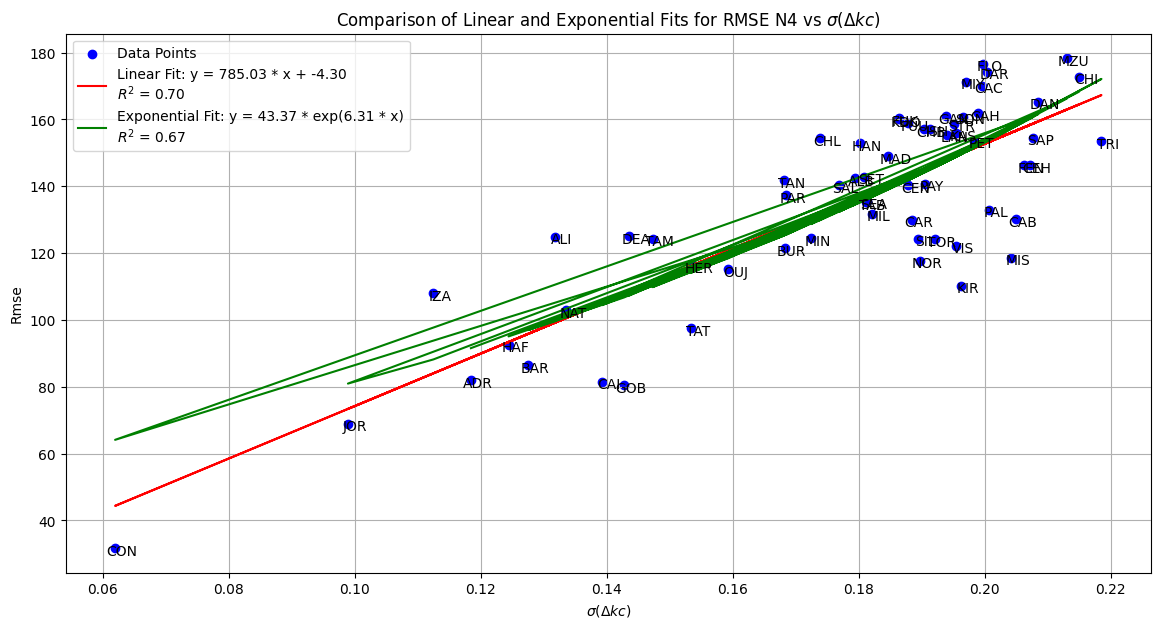

Linear Fit R²: 0.70
Exponential Fit R²: 0.67
Linear Fit Pearson Correlation: 0.83, P-value: 3.65e-17
Exponential Fit Pearson Correlation: 0.82, P-value: 4.30e-16


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

# Load the data
file_path = '../data/results_id.csv'
data = pd.read_csv(file_path)

# Define the fields to analyze
field = 'N4'

# Extract the variables
X = data[['stddeltakc']].values.reshape(-1, 1)
y = data[field].values

# Linear regression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
y_linear_pred = linear_regressor.predict(X)
linear_r2 = r2_score(y, y_linear_pred)

# Exponential regression
def exponential_model(x, a, b):
    return a * np.exp(b * x)

# Initial guess for the parameters
initial_guess = [1, 0.1]

# Fit the exponential model
params, covariance = curve_fit(exponential_model, X.flatten(), y, p0=initial_guess)
y_exp_pred = exponential_model(X.flatten(), *params)
exp_r2 = r2_score(y, y_exp_pred)

# Pearson correlation for linear fit
pearson_corr_linear, p_value_linear = pearsonr(y, y_linear_pred)

# Pearson correlation for exponential fit
pearson_corr_exp, p_value_exp = pearsonr(y, y_exp_pred)

# Plotting the data and the fits
plt.figure(figsize=(14, 7))

# Scatter plot
plt.scatter(X, y, label='Data Points', color='blue')

# Plot linear fit
plt.plot(X, y_linear_pred, label=f'Linear Fit: y = {linear_regressor.coef_[0]:.2f} * x + {linear_regressor.intercept_: .2f}\n$R^2$ = {linear_r2:.2f}', color='red')

# Plot exponential fit
plt.plot(X, y_exp_pred, label=f'Exponential Fit: y = {params[0]:.2f} * exp({params[1]:.2f} * x)\n$R^2$ = {exp_r2:.2f}', color='green')

# Annotate each point with the site name
for i, row in data.iterrows():
    plt.annotate(row['Site'], (row['stddeltakc'], row[field]), textcoords="offset points", xytext=(5, -5), ha='center')

plt.title(f'Comparison of Linear and Exponential Fits for RMSE {field} vs $\\sigma (\\Delta kc)$')
plt.xlabel('$\\sigma (\\Delta kc)$')
plt.ylabel('Rmse')
plt.legend()
plt.grid(True)
plt.show()

# Print the results
print(f'Linear Fit R²: {linear_r2:.2f}')
print(f'Exponential Fit R²: {exp_r2:.2f}')
print(f'Linear Fit Pearson Correlation: {pearson_corr_linear:.2f}, P-value: {p_value_linear:.2e}')
print(f'Exponential Fit Pearson Correlation: {pearson_corr_exp:.2f}, P-value: {p_value_exp:.2e}')



Analyzing N1...


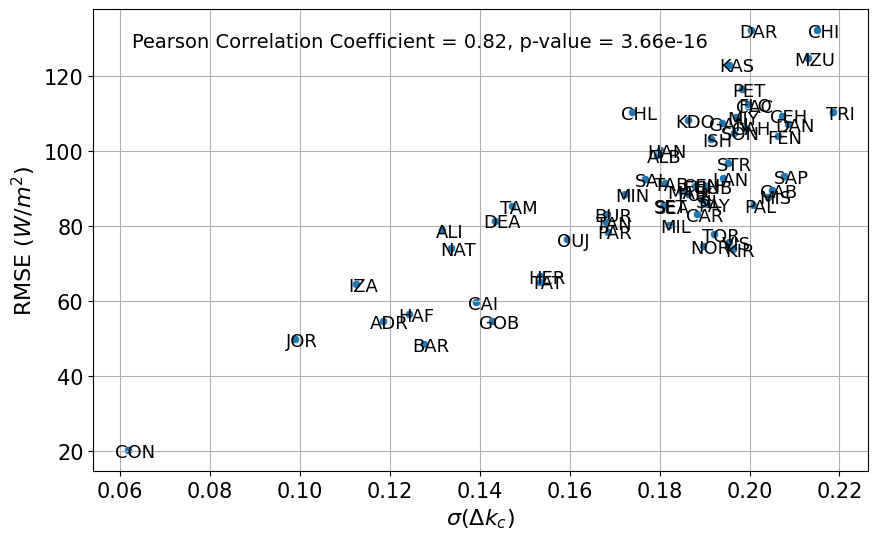

Pearson Correlation Coefficient: 0.82
P-value: 3.661220883636718e-16


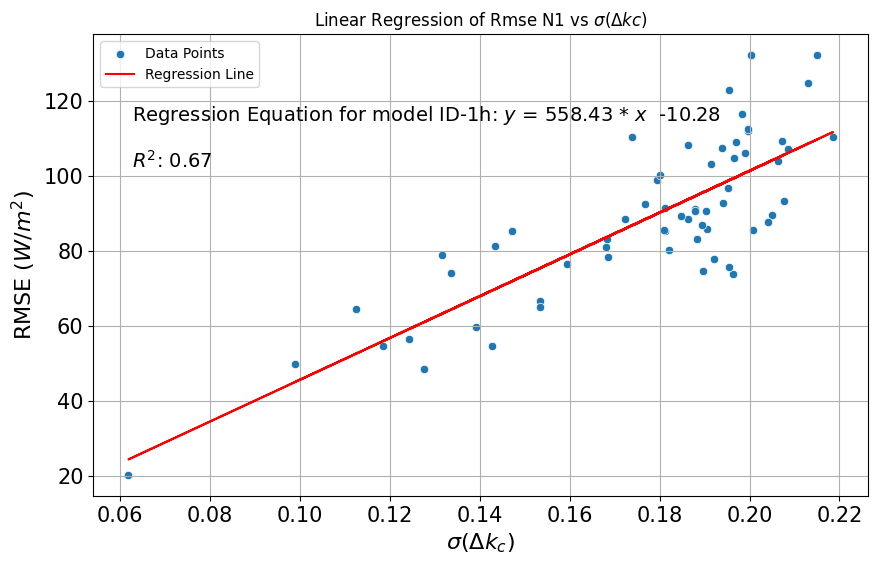

Regression Equation N1: 558.43 * X + -10.28
R^2: 0.67

computing conditional quantiles for  N1...


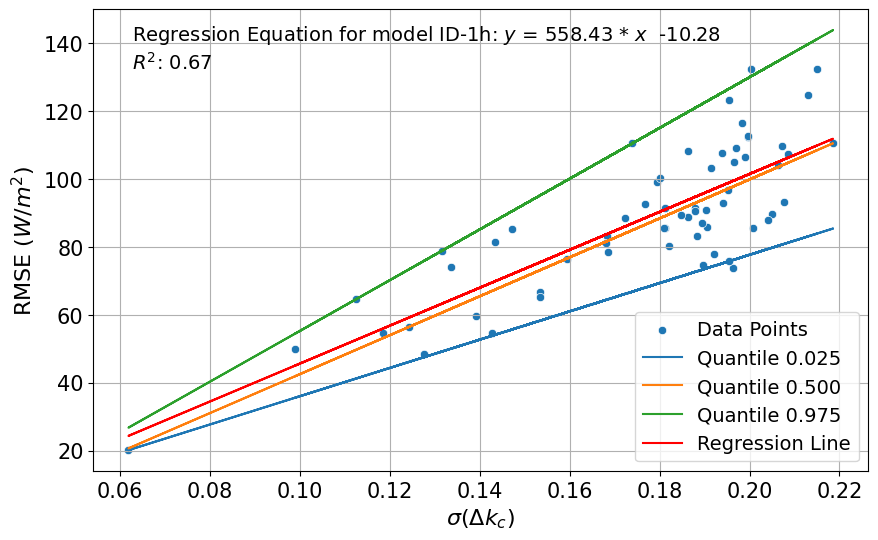

Quantile Regression Coefficients for N1:
Quantile 0.025: -5.68, 416.46
Quantile 0.500: -14.89, 573.37
Quantile 0.975: -19.56, 747.18

Analyzing N2...


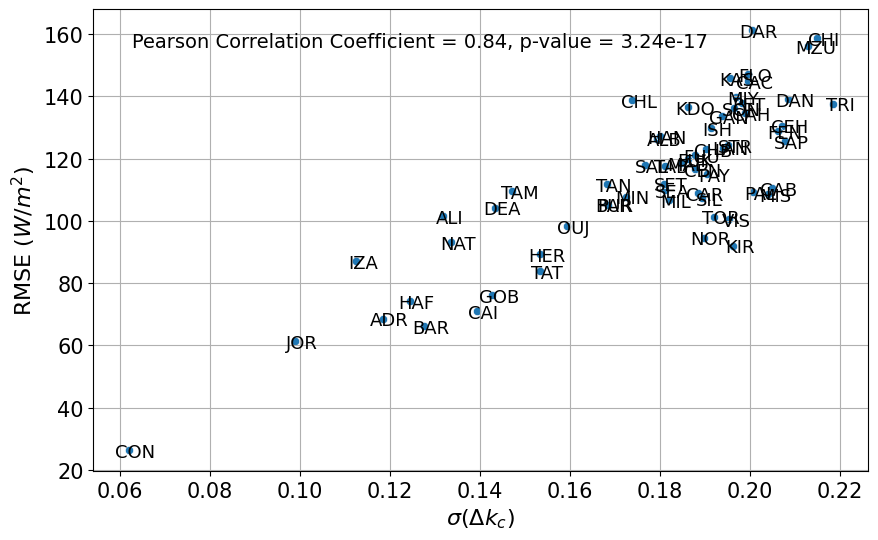

Pearson Correlation Coefficient: 0.84
P-value: 3.2407669540682323e-17


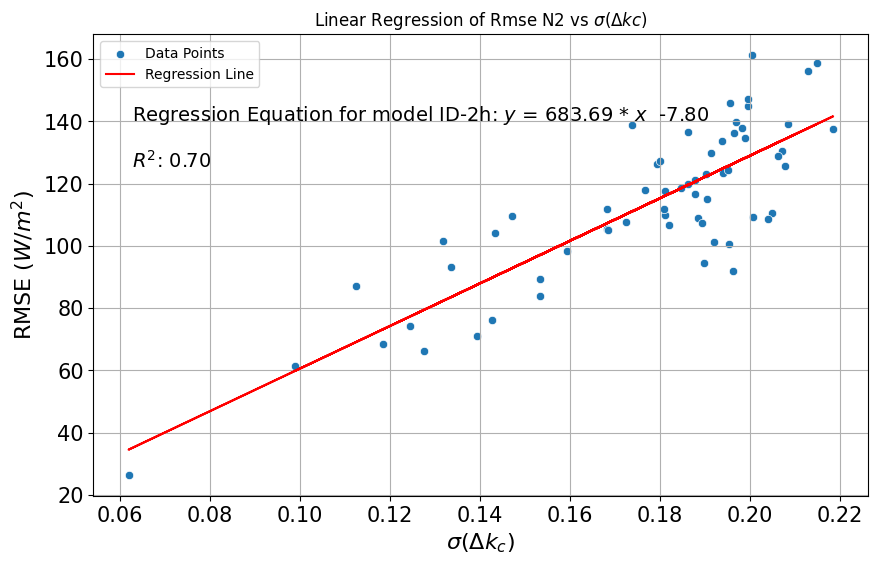

Regression Equation N2: 683.69 * X + -7.80
R^2: 0.70

computing conditional quantiles for  N2...


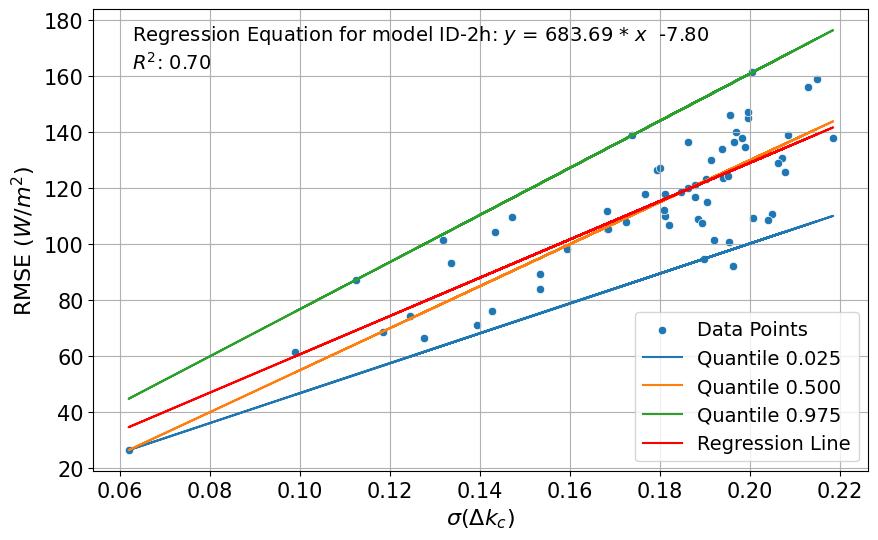

Quantile Regression Coefficients for N2:
Quantile 0.025: -6.71, 534.16
Quantile 0.500: -20.08, 749.78
Quantile 0.975: -7.40, 840.77

Analyzing N3...


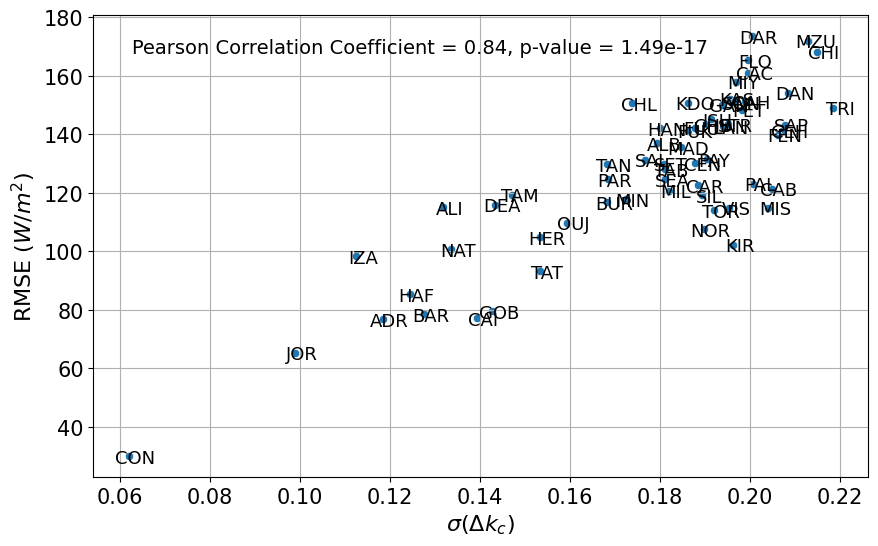

Pearson Correlation Coefficient: 0.84
P-value: 1.4939696869804942e-17


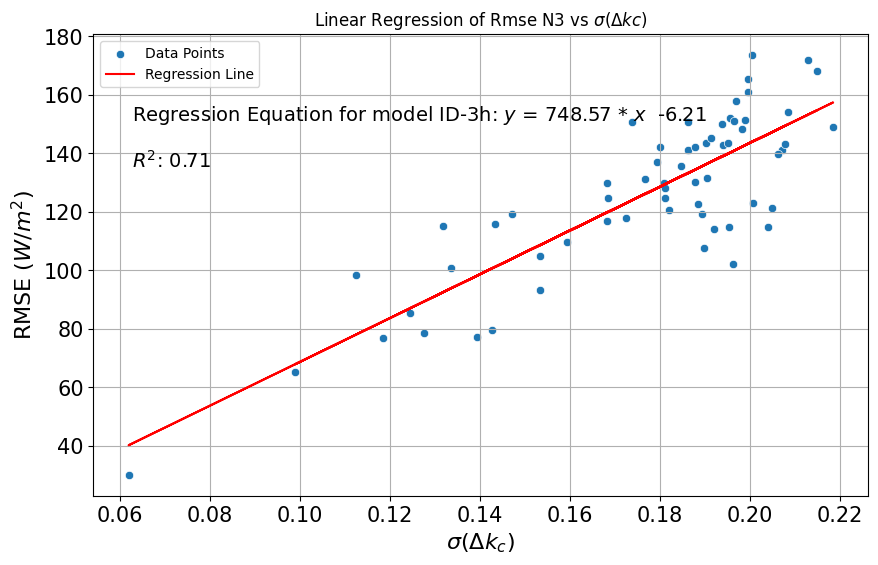

Regression Equation N3: 748.57 * X + -6.21
R^2: 0.71

computing conditional quantiles for  N3...


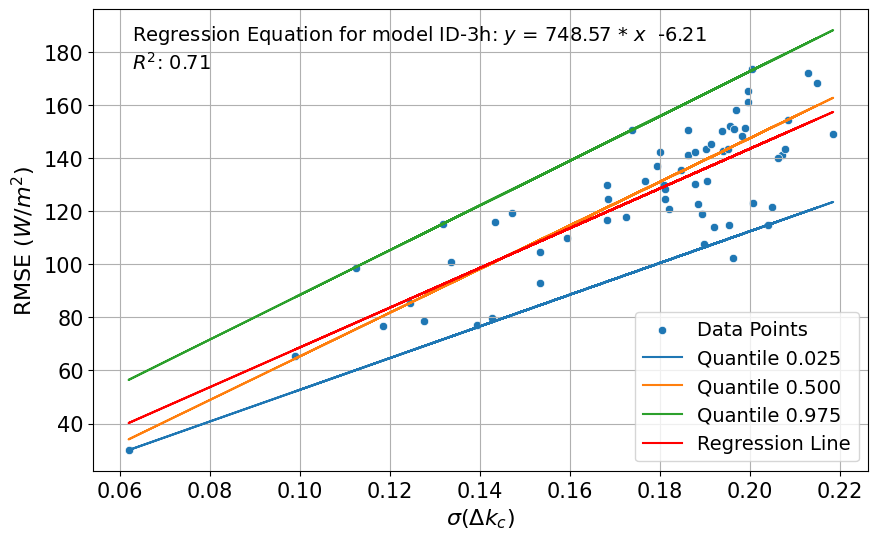

Quantile Regression Coefficients for N3:
Quantile 0.025: -7.04, 597.18
Quantile 0.500: -16.93, 822.04
Quantile 0.975: 4.26, 841.74

Analyzing N4...


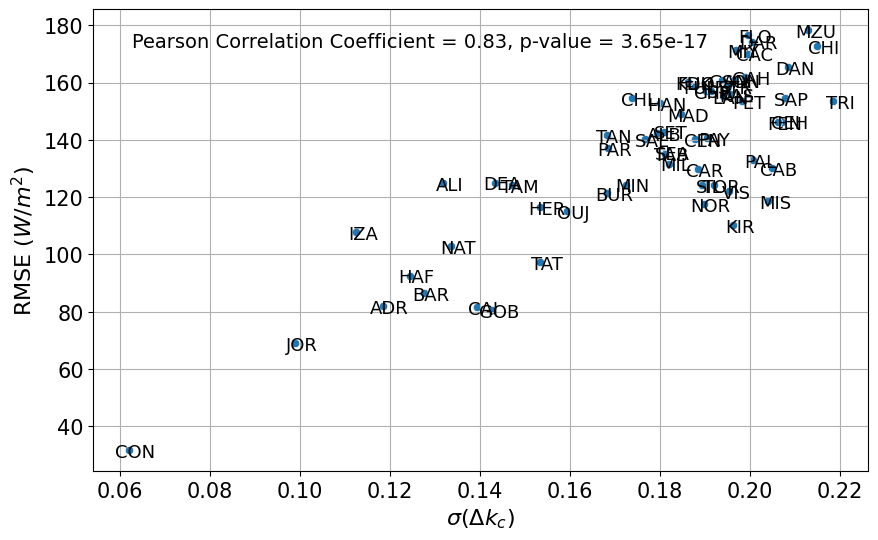

Pearson Correlation Coefficient: 0.83
P-value: 3.6495874782775956e-17


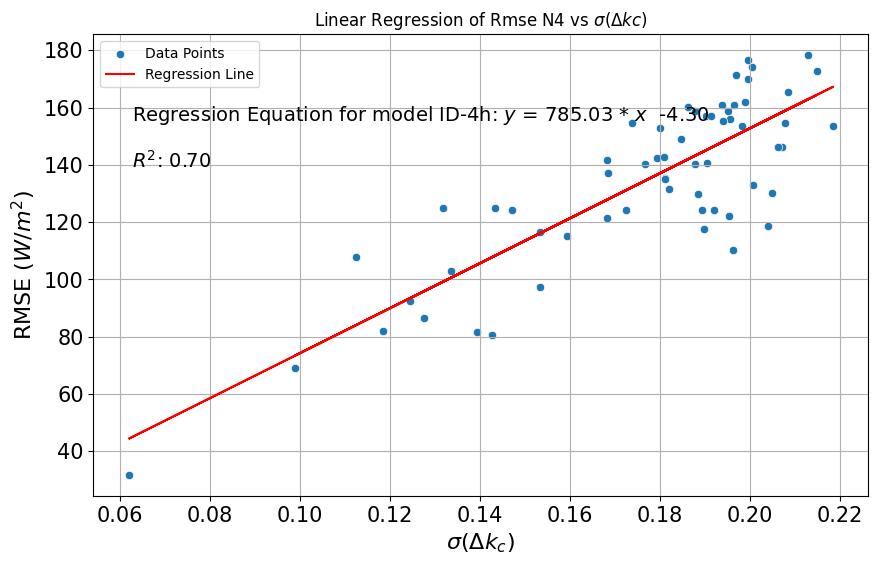

Regression Equation N4: 785.03 * X + -4.30
R^2: 0.70

computing conditional quantiles for  N4...


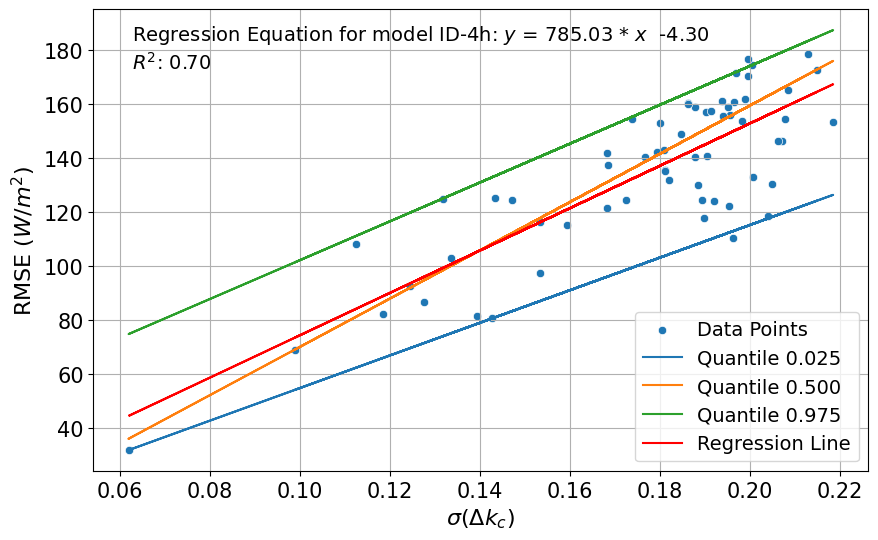

Quantile Regression Coefficients for N4:
Quantile 0.025: -5.77, 604.18
Quantile 0.500: -19.54, 894.35
Quantile 0.975: 30.09, 719.43

Analyzing N5...


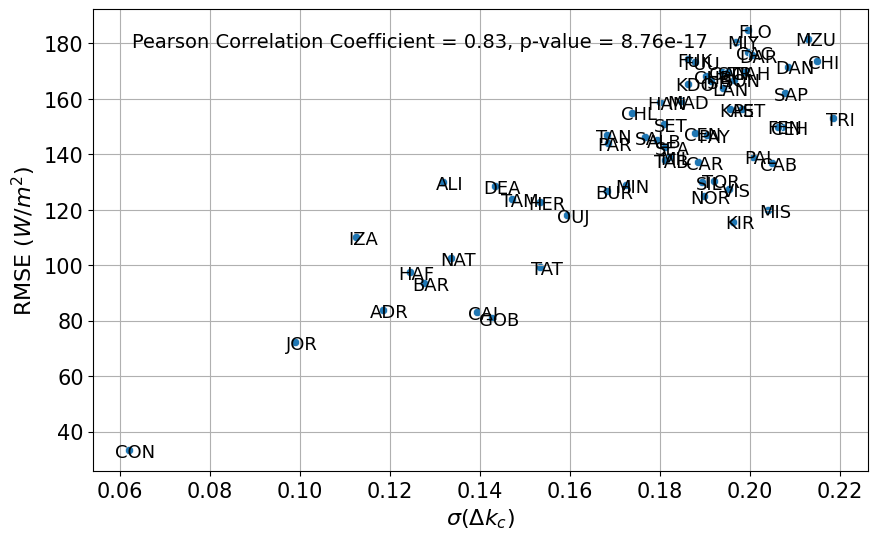

Pearson Correlation Coefficient: 0.83
P-value: 8.759801482708503e-17


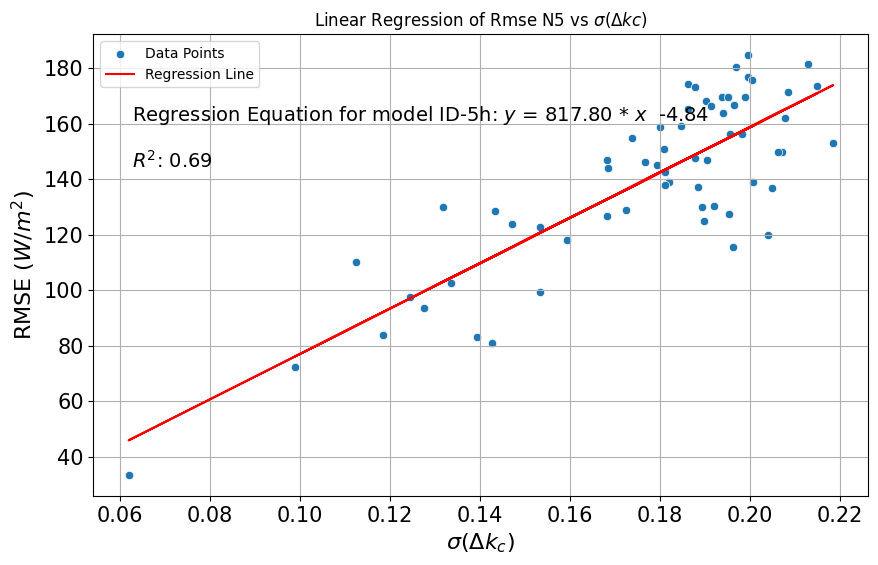

Regression Equation N5: 817.80 * X + -4.84
R^2: 0.69

computing conditional quantiles for  N5...


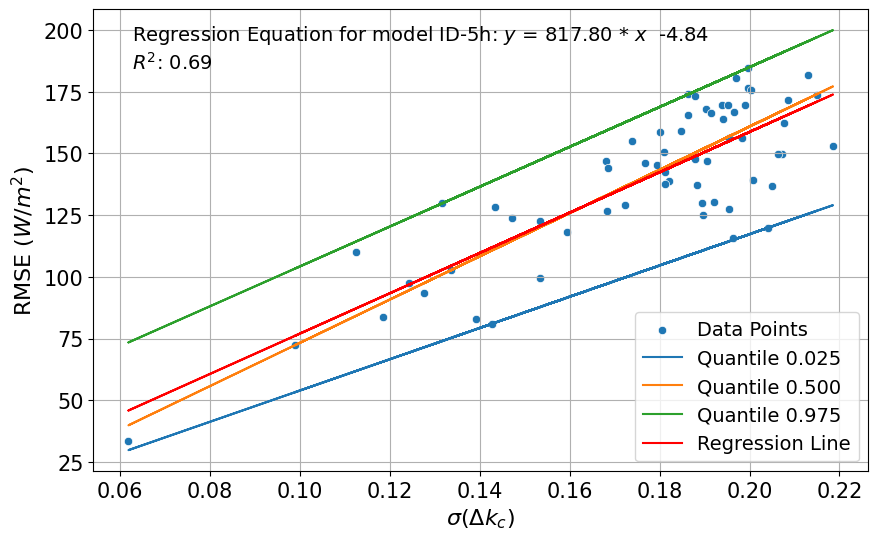

Quantile Regression Coefficients for N5:
Quantile 0.025: -9.50, 633.91
Quantile 0.500: -14.51, 877.08
Quantile 0.975: 23.34, 808.20

Analyzing N6...


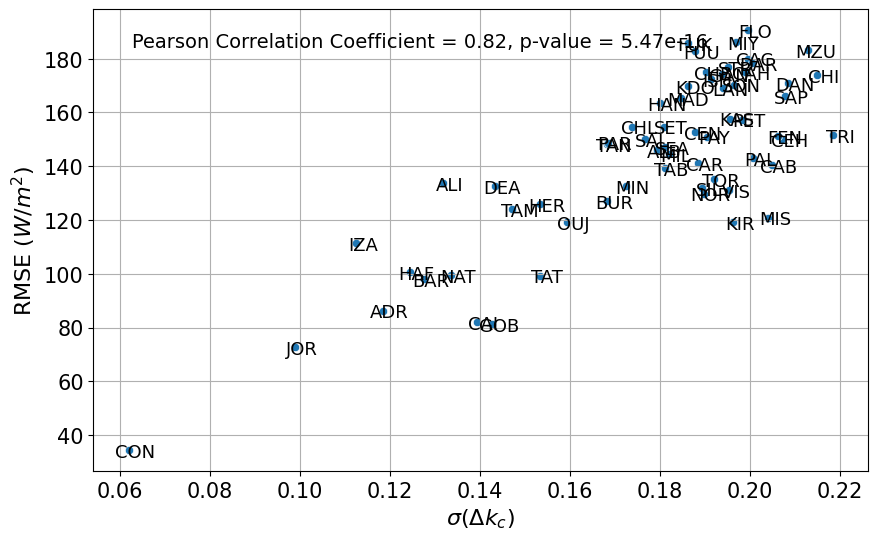

Pearson Correlation Coefficient: 0.82
P-value: 5.465091470909868e-16


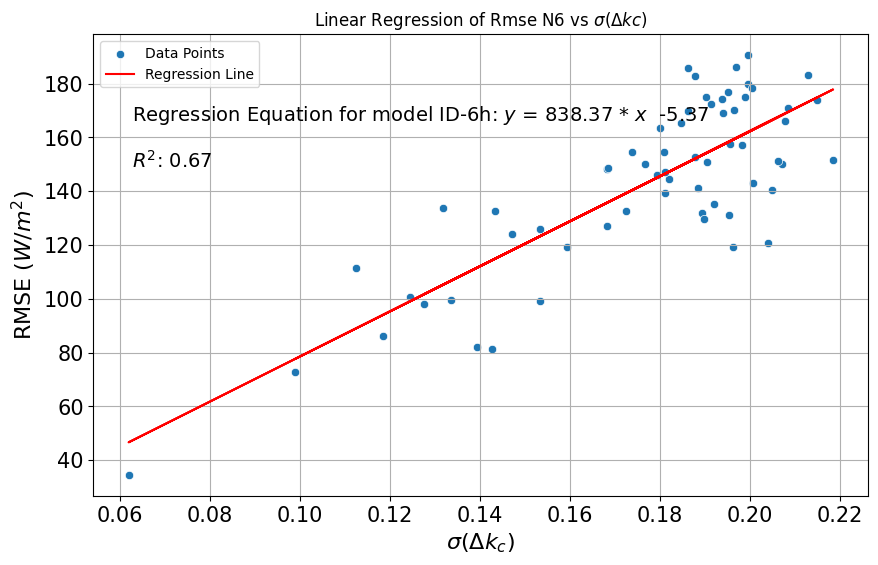

Regression Equation N6: 838.37 * X + -5.37
R^2: 0.67

computing conditional quantiles for  N6...


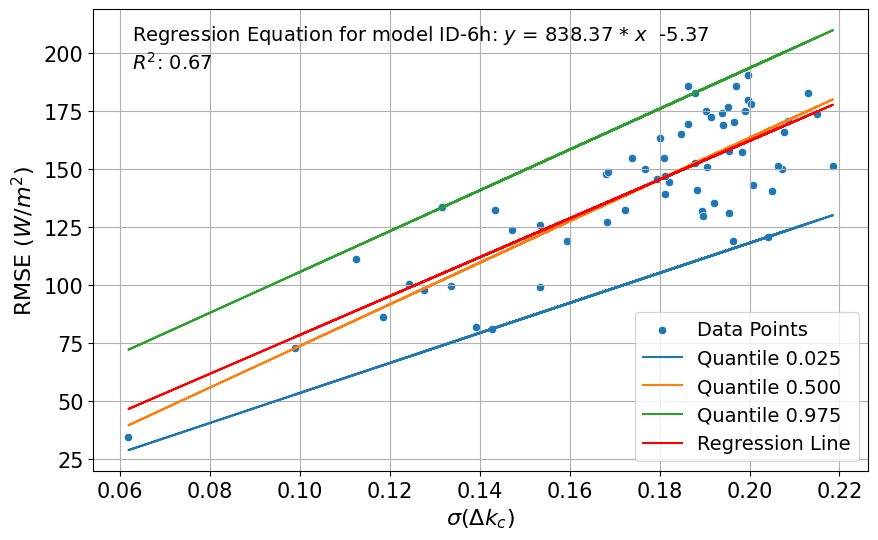

Quantile Regression Coefficients for N6:
Quantile 0.025: -11.29, 647.41
Quantile 0.500: -16.09, 898.13
Quantile 0.975: 17.58, 880.59


In [98]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Load the data (assumed to be already loaded as `data`)
# data = pd.read_csv('your_data.csv')

# List of fields to analyze
fields = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6']


# Loop through each field
for field in fields:
    print(f'\nAnalyzing {field}...')

    # Step 1: Summary Statistics
    # summary_statistics = data[['stddeltakc', field]].describe()
    # print(summary_statistics)

    # Step 2: Scatter Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='stddeltakc', y=field, data=data)
    # Annotate each point with the site name
    for i, row in data.iterrows():
        plt.annotate(row['Site'], (row['stddeltakc'], row[field]), textcoords="offset points", xytext=(5, -5), ha='center',fontsize=13)

    # Step 3: Correlation Coefficient
    correlation_coefficient, p_value = pearsonr(data['stddeltakc'], data[field])
    
    plt.text(0.05, 0.95, f'Pearson Correlation Coefficient = {correlation_coefficient:.2f}, p-value = {p_value:.2e}', transform=plt.gca().transAxes, 
             fontsize=14, verticalalignment='top')


    #plt.title(f'Scatter Plot of intra-day RMSE vs $\\sigma (\\Delta kc)$  - {field}')
    plt.xlabel('$\\sigma (\\Delta k_c)$',fontsize=16)
    plt.ylabel('RMSE $(W/m^2)$',fontsize=16)
    plt.yticks(fontsize=15) 
    plt.xticks(fontsize=15) 
    plt.grid(True)
    plt.savefig(f'../figures/intra-day_rmse_vs_stddeltakc_{field}.png', format='png')
    plt.show()

    print(f'Pearson Correlation Coefficient: {correlation_coefficient:.2f}')
    print(f'P-value: {p_value}')

    # Step 4: Regression Analysis
    X = data[['stddeltakc']].values.reshape(-1, 1)
    y = data[field].values

    regressor = LinearRegression()
    regressor.fit(X, y)
    y_pred = regressor.predict(X)

    # Plotting the regression line
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='stddeltakc', y=field, data=data, label='Data Points')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    
    # Regression coefficients
    regression_coef = regressor.coef_[0]
    regression_intercept = regressor.intercept_
   



    # Regression equation
    regression_eq = f'Regression Equation for model ID-{field[1:]}h: $y$ = {regression_coef:.2f} * $x$  {regression_intercept:.2f}'
    
    # R^2
    r2 = r2_score(y, y_pred)
    r2_text = f'$R^2$: {r2:.2f}'

    plt.text(0.05, 0.85, regression_eq, transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')
    plt.text(0.05, 0.75, r2_text, transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

    plt.title(f'Linear Regression of Rmse {field} vs $\\sigma (\\Delta kc)$')
    plt.xlabel('$\\sigma (\\Delta k_c)$',fontsize=16)
    plt.ylabel('RMSE $(W/m^2)$',fontsize=16)
    plt.yticks(fontsize=15) 
    plt.xticks(fontsize=15) 
    plt.legend()
    plt.grid(True)
    plt.savefig(f'../figures/intra-day_linearfit_{field}.png', format='png')
    plt.show()

    print(f'Regression Equation {field}: {regression_coef:.2f} * X + {regression_intercept:.2f}')
    print(f'R^2: {r2:.2f}')
    # Define the quantiles
    quantiles = (0.025, 0.5, 0.975)

    print(f'\ncomputing conditional quantiles for  {field}...')

    xx = data[['stddeltakc']].values.reshape(-1, 1)

    # Add a constant to the predictor variable for the intercept term
    X = sm.add_constant(xx)  # Convert to numpy array

    # Perform quantile regression and store the results
    quantile_regressions = [sm.QuantReg(data[field].values, X).fit(q=q) for q in quantiles]

    # Extract the predictions for each quantile
    quantile_predictions = {q: qr.predict(X) for q, qr in zip(quantiles, quantile_regressions)}

    # Linear regression for comparison
    y = data[field].values
    regressor = LinearRegression()
    regressor.fit(xx, y)
    y_pred = regressor.predict(xx)

    # Plotting the quantile regression lines
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='stddeltakc', y=field, data=data, label='Data Points')

    for q in quantiles:
        plt.plot(xx, quantile_predictions[q], label=f'Quantile {q:.3f}')

    plt.plot(xx, y_pred, color='red', label='Regression Line')
    plt.text(0.05, 0.97, regression_eq, transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')
    plt.text(0.05, 0.91, r2_text, transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')
    #plt.title(f'Quantile Regression of Rmse {field} vs $\\sigma (\\Delta kc)$')
    plt.xlabel('$\\sigma (\\Delta k_c)$',fontsize=16)
    plt.ylabel('RMSE $(W/m^2)$',fontsize=16)
    plt.yticks(fontsize=15) 
    plt.xticks(fontsize=15) 
    plt.legend(fontsize=14)  # Change fontsize as needed
    plt.grid(True)
    plt.savefig(f'../figures/intra-day_quantilereg_{field}.png', format='png')
    plt.show()
    

    # Display the quantile regression coefficients
    quantile_coefficients = {q: qr.params for q, qr in zip(quantiles, quantile_regressions)}
    
    
    print(f'Quantile Regression Coefficients for {field}:')
    for q, params in quantile_coefficients.items():
        formatted_params = ", ".join([f"{param:.2f}" for param in params])
        print(f'Quantile {q:.3f}: {formatted_params}')


# Determine conditional quantiles for NN model 1h- 6h


Analyzing N1...


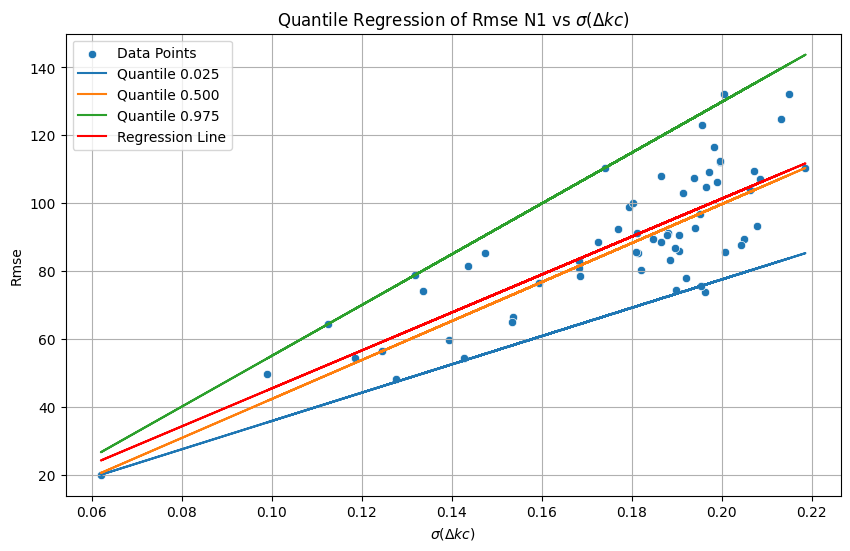

Quantile Regression Coefficients for N1:
Quantile 0.025: -5.68, 416.46
Quantile 0.500: -14.89, 573.37
Quantile 0.975: -19.56, 747.18

Analyzing N2...


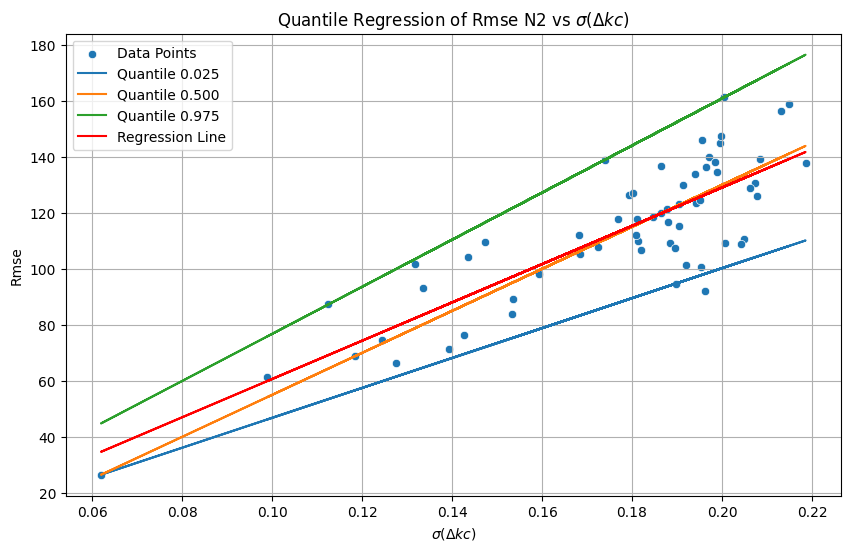

Quantile Regression Coefficients for N2:
Quantile 0.025: -6.71, 534.16
Quantile 0.500: -20.08, 749.78
Quantile 0.975: -7.40, 840.77

Analyzing N3...


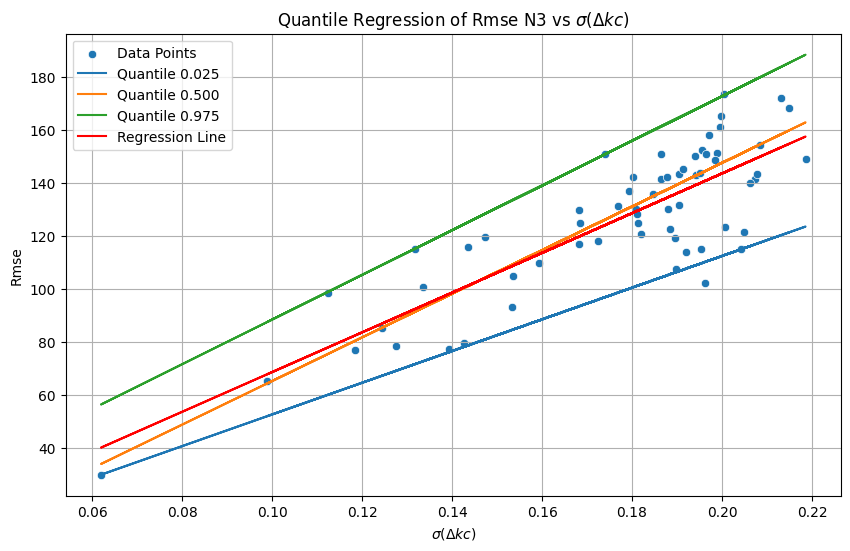

Quantile Regression Coefficients for N3:
Quantile 0.025: -7.04, 597.18
Quantile 0.500: -16.93, 822.04
Quantile 0.975: 4.26, 841.74

Analyzing N4...


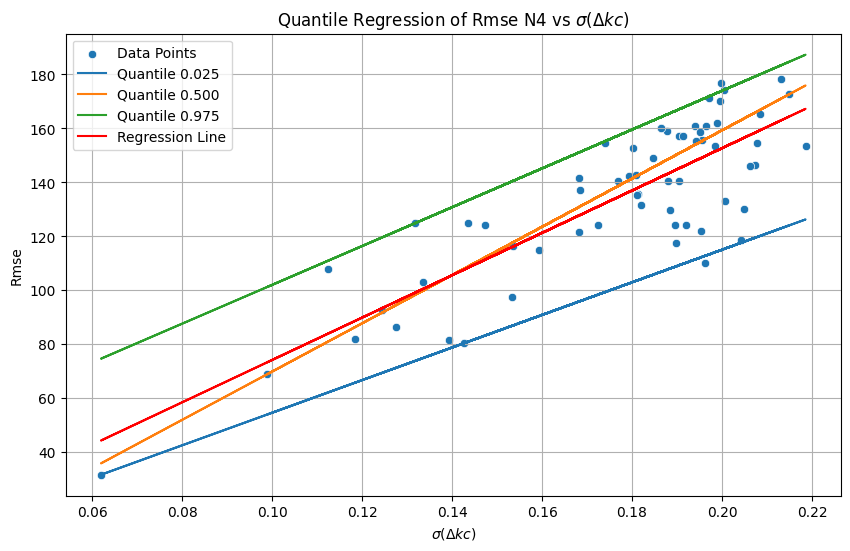

Quantile Regression Coefficients for N4:
Quantile 0.025: -5.77, 604.18
Quantile 0.500: -19.54, 894.35
Quantile 0.975: 30.09, 719.43

Analyzing N5...


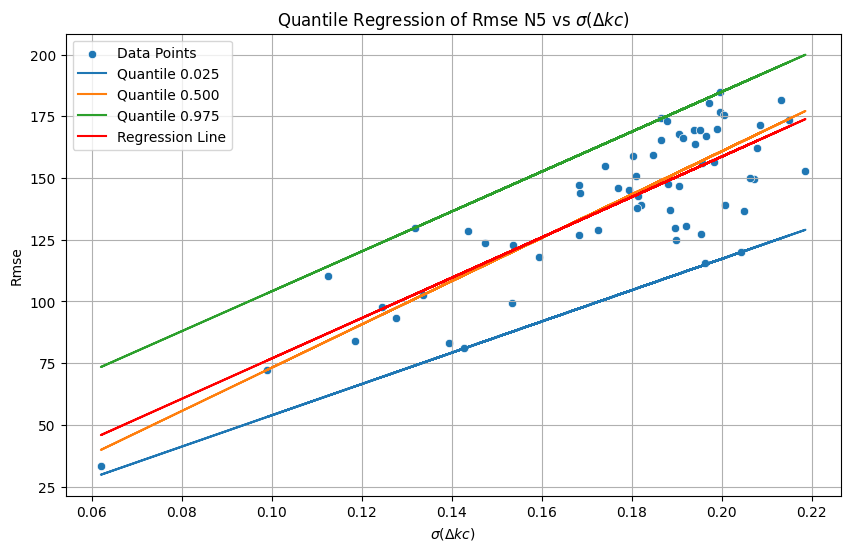

Quantile Regression Coefficients for N5:
Quantile 0.025: -9.50, 633.91
Quantile 0.500: -14.51, 877.08
Quantile 0.975: 23.34, 808.20

Analyzing N6...


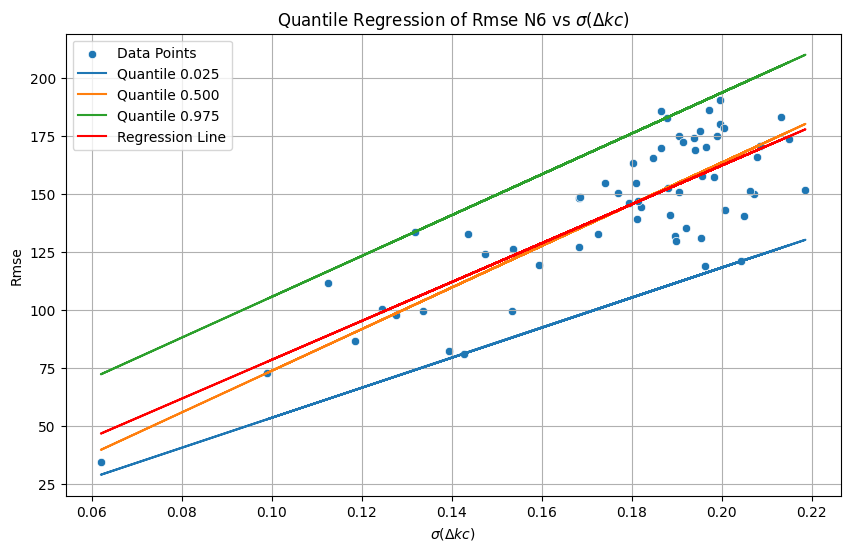

Quantile Regression Coefficients for N6:
Quantile 0.025: -11.29, 647.41
Quantile 0.500: -16.09, 898.13
Quantile 0.975: 17.58, 880.59


In [101]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Define the quantiles
quantiles = (0.025, 0.5, 0.975)

# List of fields to analyze
fields = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6']

# Loop through each field
for field in fields:
    print(f'\nAnalyzing {field}...')

    xx = data[['stddeltakc']].values.reshape(-1, 1)

    # Add a constant to the predictor variable for the intercept term
    X = sm.add_constant(xx)  # Convert to numpy array

    # Perform quantile regression and store the results
    quantile_regressions = [sm.QuantReg(data[field].values, X).fit(q=q) for q in quantiles]

    # Extract the predictions for each quantile
    quantile_predictions = {q: qr.predict(X) for q, qr in zip(quantiles, quantile_regressions)}

    # Linear regression for comparison
    y = data[field].values
    regressor = LinearRegression()
    regressor.fit(xx, y)
    y_pred = regressor.predict(xx)

    # Plotting the quantile regression lines
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='stddeltakc', y=field, data=data, label='Data Points')

    for q in quantiles:
        plt.plot(xx, quantile_predictions[q], label=f'Quantile {q:.3f}')

    plt.plot(xx, y_pred, color='red', label='Regression Line')
    plt.title(f'Quantile Regression of Rmse {field} vs $\\sigma (\\Delta kc)$')
    plt.xlabel('$\\sigma (\\Delta kc)$')
    plt.ylabel('Rmse')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'../figures/intra-day_quantilereg_{field}.png', format='png')
    plt.show()
    

    # Display the quantile regression coefficients
    quantile_coefficients = {q: qr.params for q, qr in zip(quantiles, quantile_regressions)}
    
    
    print(f'Quantile Regression Coefficients for {field}:')
    for q, params in quantile_coefficients.items():
        formatted_params = ", ".join([f"{param:.2f}" for param in params])
        print(f'Quantile {q:.3f}: {formatted_params}')


# Verification of the timeseries models
# read test results data

In [104]:
import pandas as pd
# test NN intra-day models on SURFRAD sites
# Load the CSV file
file_path = '../data/test_id_models.csv'
v_data = pd.read_csv(file_path)

# compute relative counterparts
# List of the columns to process
columns_to_process = ['N1','N2','N3','N4','N5','N6']

for col in columns_to_process:
    new_col = f'{col}r'
    v_data[new_col] = (v_data[col] / v_data['meanObs']) * 100


v_data.head()



Site     meanObs     stdkc  stddeltakc  meanabslogr         P1          P2  \
0  bon  377.675660  0.311251    0.190219     0.262220  92.516518  124.407174   
1  dra  514.577266  0.200073    0.137314     0.120358  68.478670   91.385731   
2  fpk  349.443527  0.277569    0.177964     0.227390  84.456762  112.862903   
3  gwn  409.515658  0.303762    0.175368     0.237932  94.740504  127.577108   
4  psu  352.472682  0.317919    0.188562     0.265515  95.110625  128.724658   

           P3          P4          P5  ...          N3          N4  \
0  146.289344  163.875396  179.721905  ...  129.638870  141.790770   
1  103.244904  114.611663  127.454959  ...   91.692624   98.380706   
2  133.097209  149.435356  160.826672  ...  117.474301  127.299411   
3  148.231568  166.960148  183.212790  ...  134.027651  147.319035   
4  152.491867  173.814887  189.814293  ...  137.038992  149.909356   

           N5          N6        N1r        N2r        N3r        N4r  \
0  150.969080  158.144991  23.294295  30.197499  34.325450  37.542999   
1  104.812225  108.041907  12.639781  16.172142  17.819020  19.118743   
2  133.677284  137.822211  23.076183  29.621742  33.617535  36.429180   
3  157.258136  164.238990  22.045312  28.843500  32.728334  35.973969   
4  158.678616  165.147036  25.945332  33.764533  38.879323  42.530773   

         N5r        N6r  
0  39.973209  41.873228  
1  20.368608  20.996246  
2  38.254331  39.440482  
3  38.401007  40.105668  
4  45.018699  46.853854  

[5 rows x 29 columns]

# compute models' predictions on test sites for NN 1h-6h
# save predictions in file predictions_ID_models.csv

In [107]:
import pandas as pd


# Define a dictionary of models for each horizon
models = {
    'NN_1h': {
        '2.5%': lambda x: -5.68 + 416.46 * x,  # Example coefficients, replace with effective values
        '50%': lambda x: -14.89 + 573.37 * x,  # Example coefficients, replace with effective values
        '97.5%': lambda x: -19.56 + 747.18 * x,  # Example coefficients, replace with effective values
        'regression': lambda x: 558.43 * x -10.28  # Example coefficients, replace with effective values
    },


    'NN_2h': {
        '2.5%': lambda x: -6.71 + 534.16 * x,  # Example coefficients, replace with effective values
        '50%': lambda x: -20.08 + 749.78 * x,  # Example coefficients, replace with effective values
        '97.5%': lambda x: -7.40 + 840.77 * x,  # Example coefficients, replace with effective values
        'regression': lambda x:  683.69 * x -7.80 # Example coefficients, replace with effective values
    },
   
    'NN_3h': {
        '2.5%': lambda x: -7.04 + 597.18* x,  # Example coefficients, replace with effective values
        '50%': lambda x:  -16.93 + 822.04 * x,  # Example coefficients, replace with effective values
        '97.5%': lambda x: 4.26 + 841.74 * x,  # Example coefficients, replace with effective values
        'regression': lambda x:  748.57 * x -6.21  # Example coefficients, replace with effective values
    },

    'NN_4h': {
        '2.5%': lambda x: -5.77 + 604.18 * x,  # Example coefficients, replace with effective values
        '50%': lambda x: -19.54  + 894.35 * x,  # Example coefficients, replace with effective values
        '97.5%': lambda x: 30.09 + 719.43 * x,  # Example coefficients, replace with effective values
        'regression': lambda x:  785.03 * x -4.30  # Example coefficients, replace with effective values
    },

    'NN_5h': {
        '2.5%': lambda x: -9.50 + 633.91* x,  # Example coefficients, replace with effective values
        '50%': lambda x:-14.51 +  877.08 * x,  # Example coefficients, replace with effective values
        '97.5%': lambda x: 23.34 + 808.20 * x,  # Example coefficients, replace with effective values
        'regression': lambda x:  817.80 * x -4.84 # Example coefficients, replace with effective values
    }, 

    'NN_6h': {
        '2.5%': lambda x: -11.29 + 647.41 * x,
        '50%': lambda x: -16.09 + 898.13 * x,
        '97.5%': lambda x: 17.58 + 880.59* x,
        'regression': lambda x: 838.37 * x -5.37
    }
    
}
# Create predictions file
# 
columns = ['Site', 'meanObs', 'stddeltakc', 'N1', 'N2', 'N3', 'N4','N5','N6','N1r', 'N2r', 'N3r', 'N4r','N5r','N6r']
o_data = pd.DataFrame(columns=columns)
o_data['Site'] = v_data['Site']
o_data['meanObs'] = v_data['meanObs']
o_data['stddeltakc'] = v_data['stddeltakc']
columns_to_process = ['N1','N2','N3','N4','N5','N6']

# Compute the new columns using a for loop
for col in columns_to_process:
    new_col = f'{col}r'
    o_data[col] = v_data[col]
    o_data[new_col] = (v_data[col] / v_data['meanObs']) * 100
    
# Loop through each horizon and apply the models
for horizon, model_funcs in models.items():
    o_data[f'{horizon}_2_5'] = v_data['stddeltakc'].apply(model_funcs['2.5%'])
    o_data[f'{horizon}_50'] = v_data['stddeltakc'].apply(model_funcs['50%'])
    o_data[f'{horizon}'] = v_data['stddeltakc'].apply(model_funcs['regression'])
    o_data[f'{horizon}_97_5'] = v_data['stddeltakc'].apply(model_funcs['97.5%'])

# Save the updated DataFrame to a new CSV file
output_file_path = '../data/predictions_ID_models.csv'
o_data.to_csv(output_file_path, index=False)
print(f"Predictions saved to {output_file_path}")


Predictions saved to ../data1/predictions_ID_models.csv


# plot error bars on test sites NN 1h - 6h

/Users/lauret/myenv/lib/python3.13/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


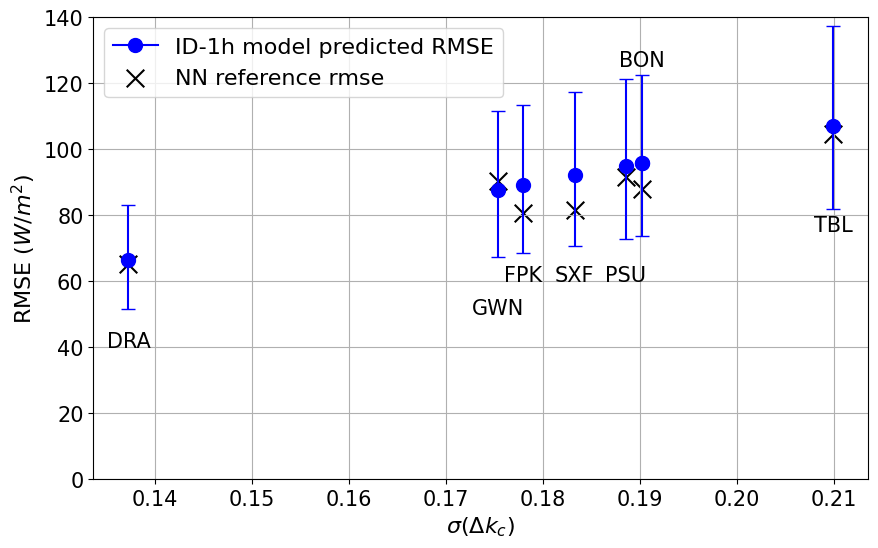

/Users/lauret/myenv/lib/python3.13/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


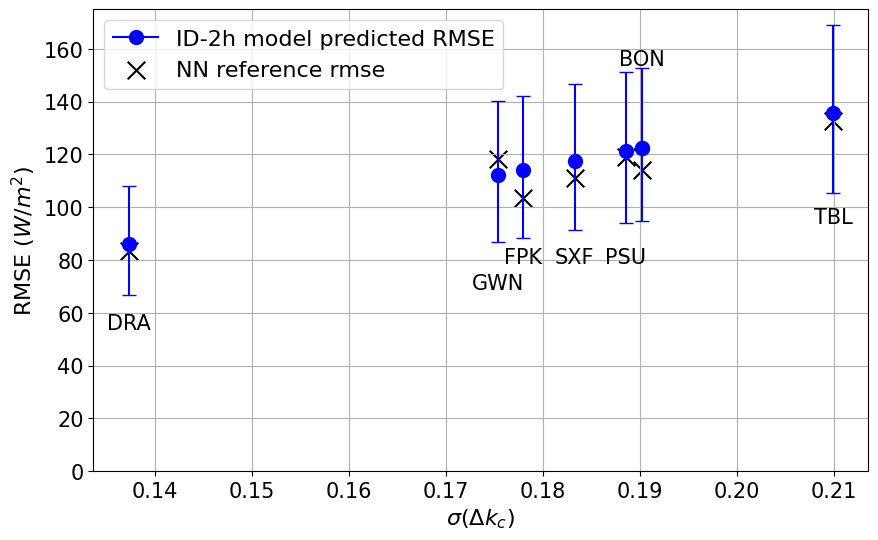

/Users/lauret/myenv/lib/python3.13/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


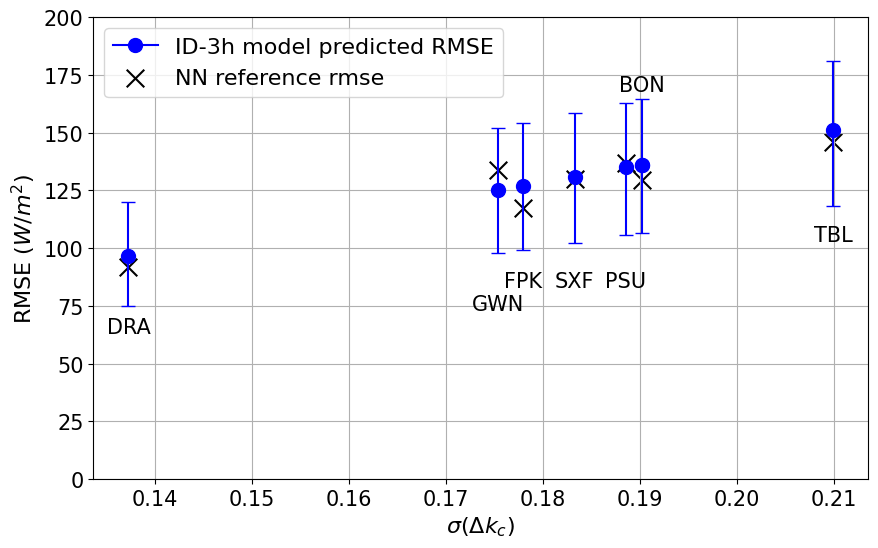

/Users/lauret/myenv/lib/python3.13/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


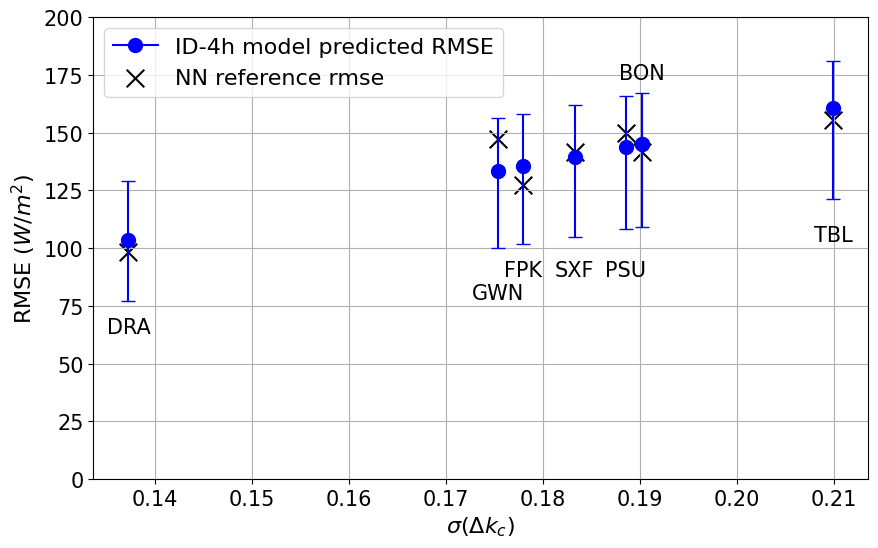

/Users/lauret/myenv/lib/python3.13/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


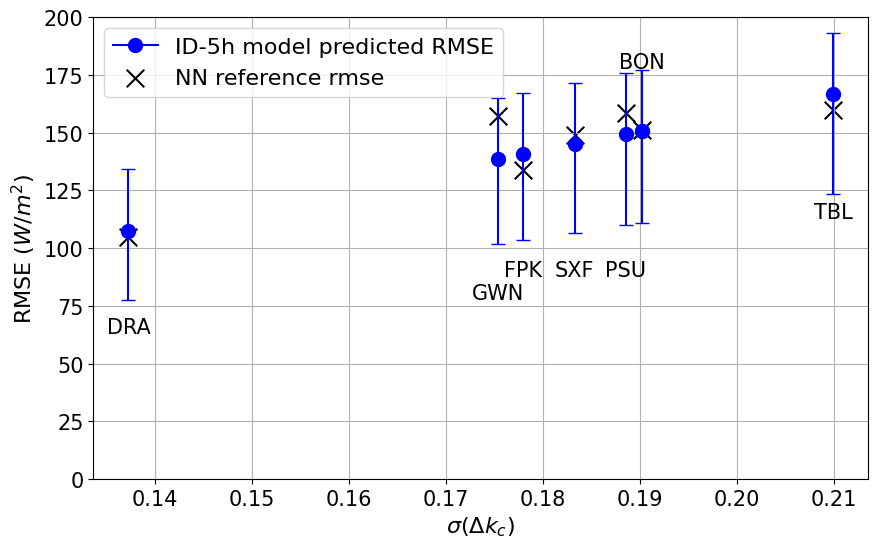

/Users/lauret/myenv/lib/python3.13/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


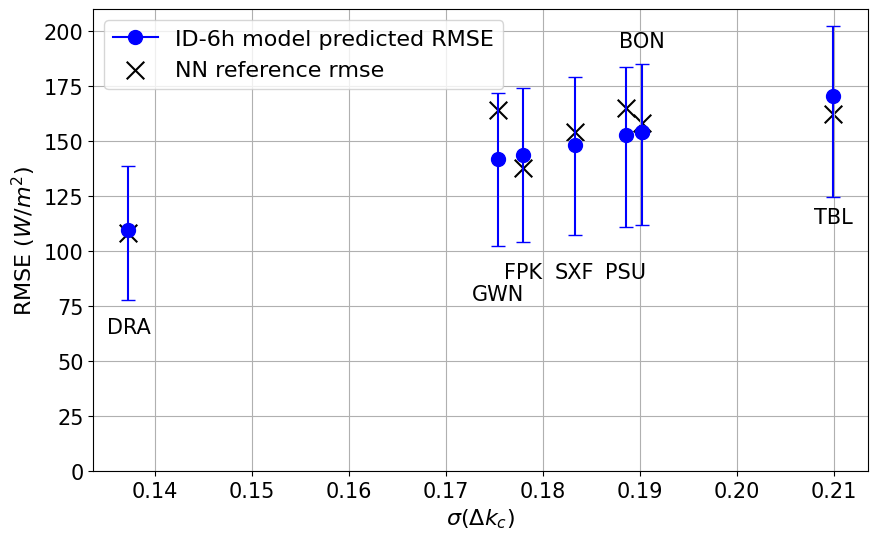

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '../data/predictions_ID_models.csv'
v_data = pd.read_csv(file_path)

# Define the function for plotting error bars
def plot_with_error_bars(site_data, site_name, model, horizon):
    x = site_data['stddeltakc']
    #y_50 = site_data[f'{model}_{horizon}_50']
    y_reg = site_data[f'{model}_{horizon}']
    y2_5 = site_data[f'{model}_{horizon}_2_5']
    y97_5 = site_data[f'{model}_{horizon}_97_5']
    yerr = [y_reg - y2_5, y97_5 - y_reg]
    
    x = x.values.flatten() if hasattr(x, 'values') else x
    y_reg = y_reg.values.flatten() if hasattr(y_reg, 'values') else y_reg
    
    plt.plot(x, y_reg,marker='o',color='blue',markersize=10)
    if site_name.upper()=='BON':
        plt.plot(x, y_reg, marker='o', markersize=10,color='blue',label=f'ID-{horizon} model predicted RMSE')
    
    plt.errorbar(x, y_reg, yerr=yerr, capsize=5,color='blue')
    
    # Define specific x and y positions for the site names
    if horizon == '1h':
        position_mapping = {
        'DRA': (0, 45),     
        'GWN': (2, 55),    
        'FPK': (3, 65),   
        'SXF': (3, 65),   
        'PSU': (3, 65),    
        'BON': (3, 130),   
        'TBL': (3, 80),    
        }
    elif horizon == '2h':
        position_mapping = {
        'DRA': (0, 60),     
        'GWN': (2, 75),    
        'FPK': (3, 85),   
        'SXF': (3, 85),   
        'PSU': (3, 85),    
        'BON': (3, 160),   
        'TBL': (3, 100),    
        }
    elif horizon == '3h' :
        position_mapping = {
        'DRA': (0, 70),     
        'GWN': (2, 80),    
        'FPK': (3, 90),   
        'SXF': (3, 90),   
        'PSU': (3, 90),    
        'BON': (3, 175),   
        'TBL': (3, 110),    
        }
    elif horizon == '4h' :
        position_mapping = {
        'DRA': (0, 70),     
        'GWN': (2, 85),    
        'FPK': (3, 95),   
        'SXF': (3, 95),   
        'PSU': (3, 95),    
        'BON': (3, 180),   
        'TBL': (3, 110),    
        }
    elif horizon == '5h' :
        position_mapping = {
        'DRA': (0, 70),     
        'GWN': (2, 85),    
        'FPK': (3, 95),   
        'SXF': (3, 95),   
        'PSU': (3, 95),    
        'BON': (3, 185),   
        'TBL': (3, 120),    
        }
    elif horizon == '6h' :
        position_mapping = {
        'DRA': (0, 70),     
        'GWN': (2, 85),    
        'FPK': (3, 95),   
        'SXF': (3, 95),   
        'PSU': (3, 95),    
        'BON': (3, 200),   
        'TBL': (3, 120),    
        }
    # Get the specific positions for the current site name
    x_pos, y_pos = position_mapping.get(site_name.upper(), (x[0], y_reg[0]))  # Default to first position if not found

    for i in range(len(x)):
    # Dynamically adjust the y-position to avoid text overlap
        plt.text(x[0], y_pos, site_name.upper(), fontsize=15, ha='center', va='top')
    
    

    
    plt.xlabel('$\\sigma (\\Delta k_c)$',fontsize=16)
    plt.ylabel('RMSE $(W/m^2)$',fontsize=16)
    plt.xticks( fontsize=15)  # Increase the size of x-tick labels
    plt.yticks( fontsize=15)  # Increase the size of y-tick labels

    # Define y-axis limits
    # Dynamic y-axis limits based on horizon
    if horizon == '1h':
        plt.ylim(0, 140)
    elif horizon == '2h':
        plt.ylim(0, 175)
    elif horizon == '3h':
        plt.ylim(0, 200)
    elif horizon == '4h':
        plt.ylim(0, 200)
    elif horizon == '5h':
        plt.ylim(0, 200)
    elif horizon == '6h':
        plt.ylim(0, 210) 
    if site_name.upper()=='DRA' :
         plt.legend(fontsize=16, loc='upper left')  
    #plt.title(f'Predicted {model} model {horizon} RMSE vs stddeltakc with 95% Uncertainty Interval')
    plt.grid(True)


# Automate the plotting for forecast horizons 1h to 6h
models = ['NN']
horizons = ['1h', '2h', '3h', '4h', '5h', '6h']

for model in models:
    for horizon in horizons:
        plt.figure(figsize=(10, 6))
        grouped = v_data.groupby('Site')
        for site_name, site_data in grouped:
            plot_with_error_bars(site_data, site_name, model, horizon)
            plt.scatter(site_data['stddeltakc'], site_data[f'N{horizon[0]}'], label=f'NN reference rmse', s=160,marker='x',color='black')
        
        #plt.legend()
        plt.savefig(f'../figures/rmse_vs_stddeltakc_NN_{horizon}.png', format='png')
        plt.show()


# plot rmse and 95% uncertainty interval for each site and for each horizon

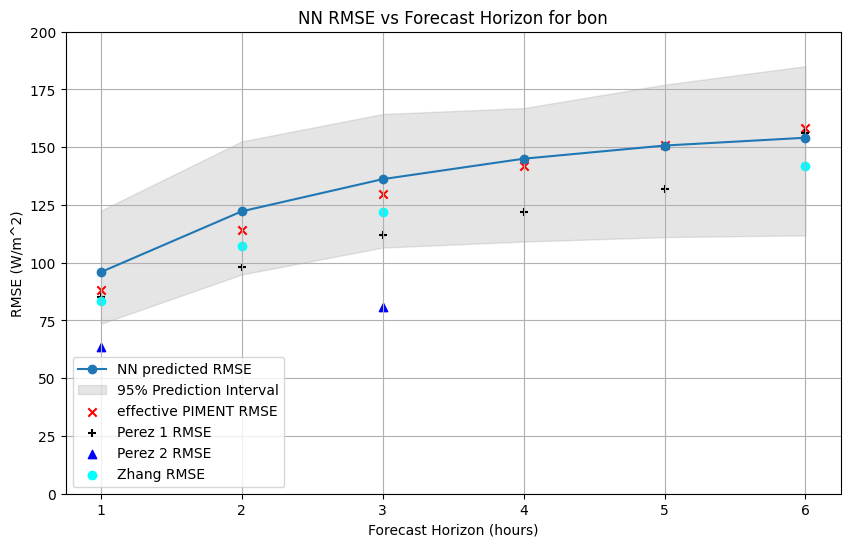

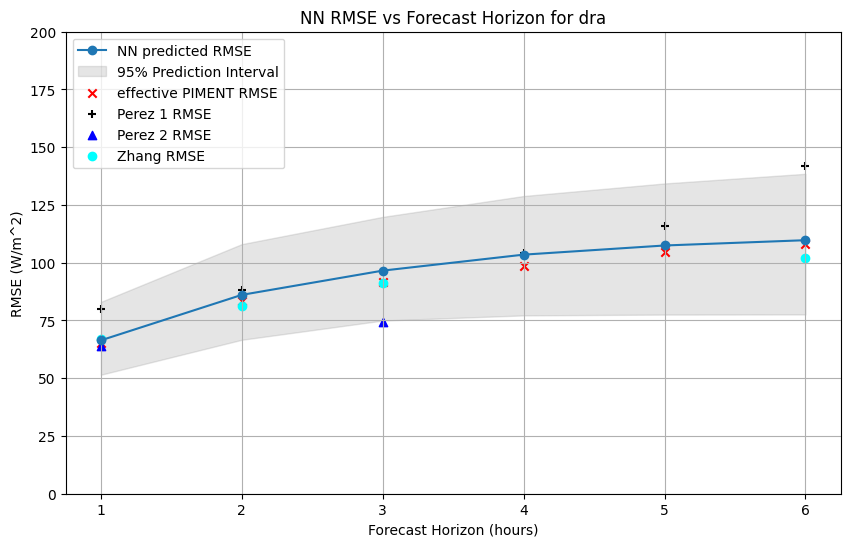

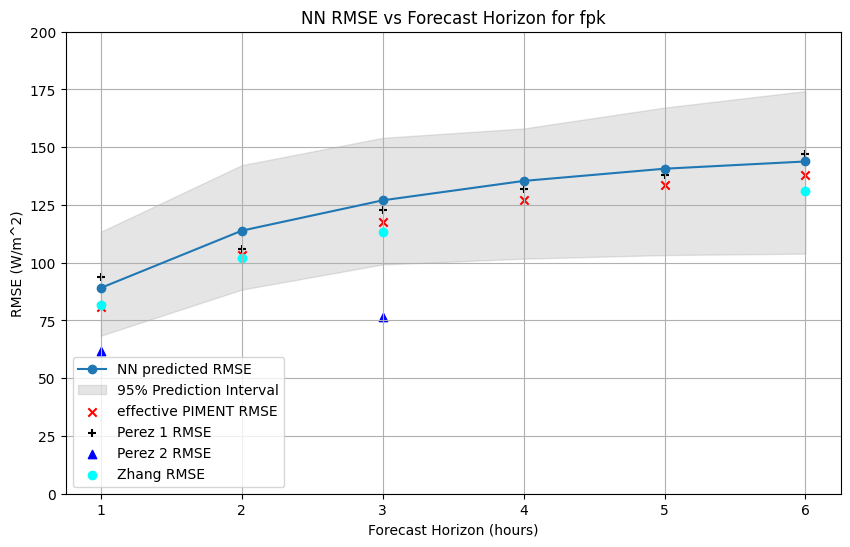

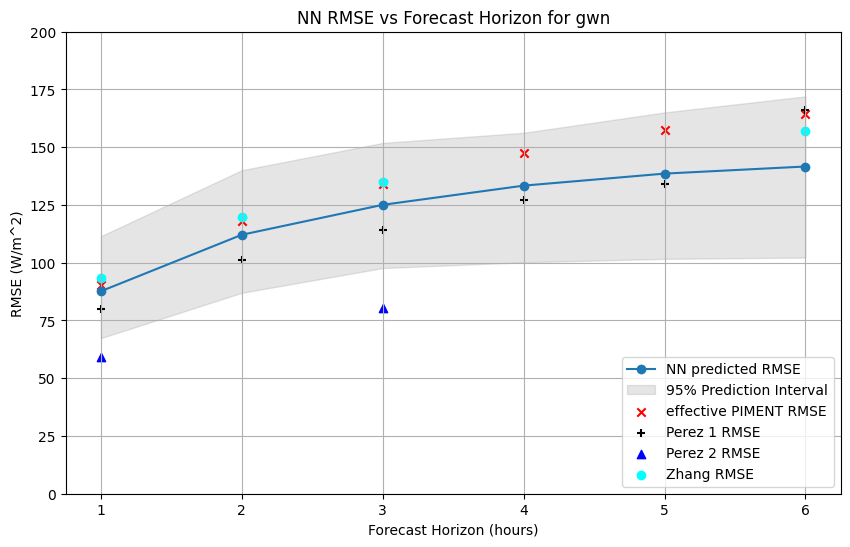

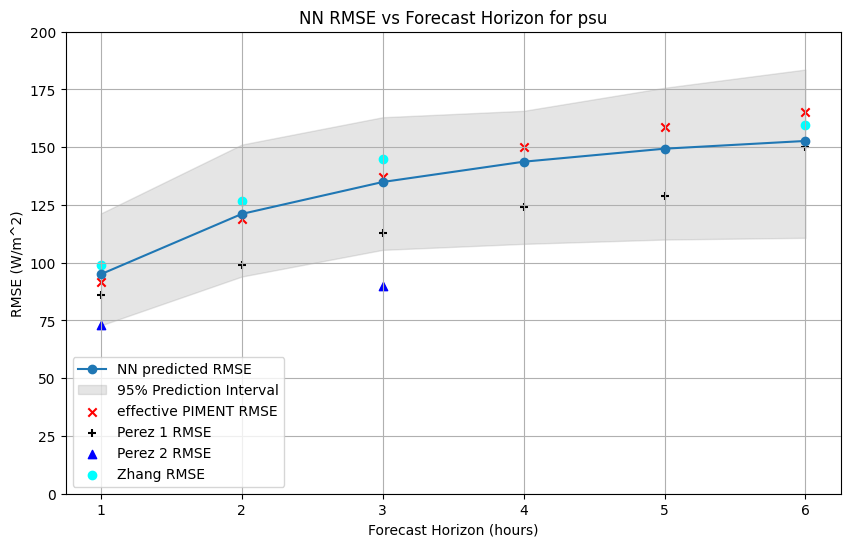

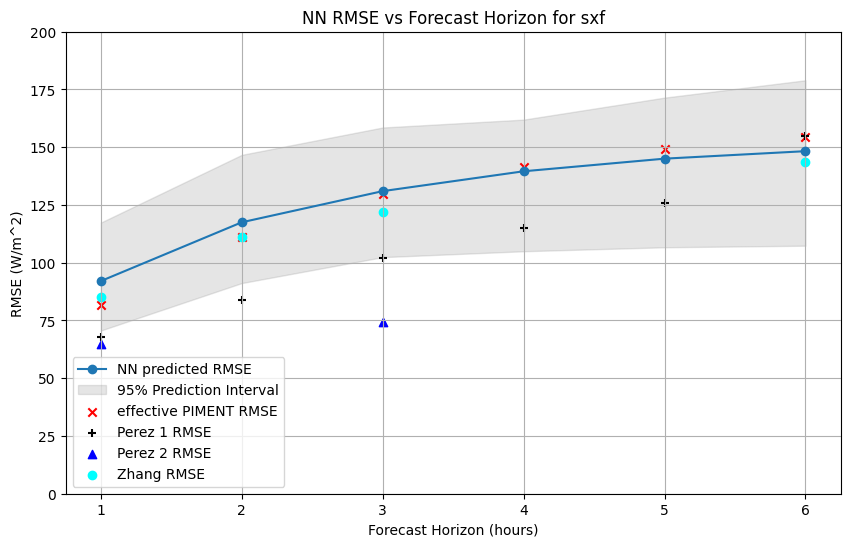

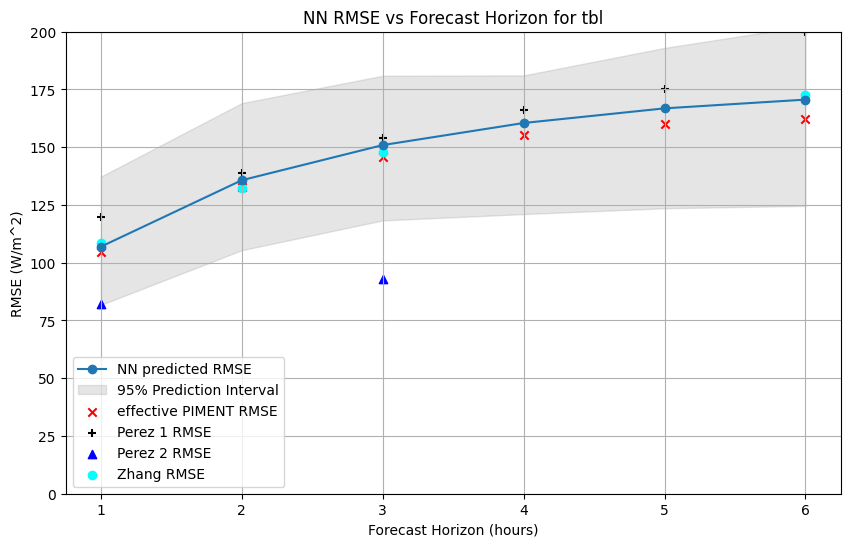

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Perez's results
# Perez et al, 2010
file_path = '../data/results_perez2010_h.csv'
pr1_data = pd.read_csv(file_path)
# Perez et al, 2018
file_path = '../data/results_perez2018_h.csv'
pr2_data = pd.read_csv(file_path)
# Load Zhang's results
# Zhang et al, 2022
file_path = '../data/results_zhang2022_h.csv'
zh_data = pd.read_csv(file_path)

# Load the predictions results
file_path = '../data/predictions_ID_models.csv'
v_data = pd.read_csv(file_path)


columns_to_process = ['H1','H2','H3','H4','H5','H6']

# Compute the new columns using a for loop
for col in columns_to_process:
    v_data[f'{col}_pr1'] = pr1_data[col]
    v_data[f'{col}_pr2'] = pr2_data[col]
    v_data[f'{col}_zh'] =  zh_data[col]

v_data['meanO_pr1'] = pr1_data['meanObs']
v_data['meanO_pr2'] = pr2_data['meanObs']
v_data['meanO_zh'] = zh_data['meanObs']

v_data.head()          
                      
# Define the horizons
horizons = ['1h', '2h', '3h', '4h', '5h', '6h']
# Define hours
hours = ['1', '2', '3', '4', '5', '6']

# Define a function to plot the RMSE of the median vs the forecast horizon
def plot_rmse_vs_horizon(site_data, site_name, model):
    forecast_horizons = list(range(1, 7))  # 1h to 6h
    #median_rmse = [site_data[f'{model}_{h}_50'].values[0] for h in horizons]
    reg_rmse = np.array([site_data[f'{model}_{h}'].values[0] for h in horizons])
    lower_bound = np.array([site_data[f'{model}_{h}_2_5'].values[0]  for h in horizons])
    upper_bound = np.array([site_data[f'{model}_{h}_97_5'].values[0]  for h in horizons])
    effective_rmse = [site_data[f'N{h}'].values[0] for h in hours]
    
    perez1_rmse = [site_data[f'H{h}_pr1'].values[0] for h in hours]
    perez2_rmse = [site_data[f'H{h}_pr2'].values[0] for h in hours]
    zhang_rmse =  [site_data[f'H{h}_zh'].values[0] for h in hours]

    
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_horizons, reg_rmse, marker='o', label=f'{model} predicted RMSE')
    plt.fill_between(forecast_horizons, lower_bound, upper_bound, color='gray', alpha=0.2, label='95% Prediction Interval')
    #plt.errorbar(forecast_horizons, median_rmse, yerr=[median_rmse - lower_bound, upper_bound - median_rmse], fmt='o', capsize=5)
    plt.scatter(forecast_horizons, effective_rmse, marker='x',color='red',label='effective PIMENT RMSE')
    plt.scatter(forecast_horizons, perez1_rmse, marker='+',color='black',label='Perez 1 RMSE')
    plt.scatter(forecast_horizons, perez2_rmse, marker='^',color='blue',label='Perez 2 RMSE')
    plt.scatter(forecast_horizons, zhang_rmse, marker='o',color='cyan',label='Zhang RMSE')

    # Define y-axis limits
    plt.ylim(0, 200)  # Set your desired y-axis limits here

    plt.xlabel('Forecast Horizon (hours)')
    plt.xlabel('Forecast Horizon (hours)')
    plt.ylabel('RMSE (W/m^2)')
    plt.title(f'{model} RMSE vs Forecast Horizon for {site_name}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# relative RMSE
def plot_relative_rmse_vs_horizon(site_data, site_name, model):
    forecast_horizons = list(range(1, 7))  # 1h to 6h
    #median_rmse = [site_data[f'{model}_{h}_50'].values[0] for h in horizons]
    
    reg_rmse = np.array([site_data[f'{model}_{h}'].values[0] for h in horizons])
    lower_bound = np.array([site_data[f'{model}_{h}_2_5'].values[0]  for h in horizons])
    upper_bound = np.array([site_data[f'{model}_{h}_97_5'].values[0]  for h in horizons])
    
    
    # Calculate rRMSE
    
    mean_obs = site_data['meanObs'].values[0]
    reg_rrmse = (reg_rmse / mean_obs) * 100
    lower_rbound = (lower_bound / mean_obs) * 100
    upper_rbound = (upper_bound / mean_obs) * 100
    effective_rrmse = [site_data[f'N{h}r'].values[0] for h in hours]
    
    perez1_rmse = np.array([site_data[f'H{h}_pr1'].values[0] for h in hours])
    perez2_rmse = np.array([site_data[f'H{h}_pr2'].values[0] for h in hours])
    zhang_rmse =  np.array([site_data[f'H{h}_zh'].values[0] for h in hours])
    perez1_rrmse  = (perez1_rmse / site_data['meanO_pr1'].values[0]) * 100
    zhang_rrmse = (zhang_rmse /site_data['meanO_zh'].values[0]) * 100
    perez2_rrmse = (perez2_rmse / site_data['meanO_pr2'].values[0]) * 100
    
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_horizons, reg_rrmse, marker='o', label=f'{model} predicted rRMSE')
    plt.scatter(forecast_horizons, effective_rrmse, marker='x',color='red',label='effective RMSE')
    plt.scatter(forecast_horizons, perez1_rrmse, marker='+',color='black',label='Perez RMSE v2')
    plt.scatter(forecast_horizons, perez2_rrmse, marker='^',color='blue',label='Perez RMSE v4')
    plt.scatter(forecast_horizons, zhang_rrmse, marker='o',color='cyan',label='Zhang RMSE')
    
    plt.fill_between(forecast_horizons, lower_rbound, upper_rbound, color='gray', alpha=0.2, label='95% Prediction Interval')
    #plt.errorbar(forecast_horizons, median_rmse, yerr=[median_rmse - lower_bound, upper_bound - median_rmse], fmt='o', capsize=5)
    plt.ylim(0, 50)  # Set your desired y-axis limits here
    plt.xlabel('Forecast Horizon (hours)')
    plt.ylabel('rRMSE (%)')
    plt.title(f'{model} rRMSE vs Forecast Horizon for {site_name}')
    plt.legend()
    plt.grid(True)
    plt.show()
# Loop over each site and plot the RMSE vs forecast horizon for NN model
grouped = v_data.groupby('Site')
model = 'NN'
for site_name, site_data in grouped:
    plot_rmse_vs_horizon(site_data, site_name, model)
    #plot_relative_rmse_vs_horizon(site_data, site_name, model)


# plot combined results (intra-day/day-ahead) for each test site and compare with some literarure results

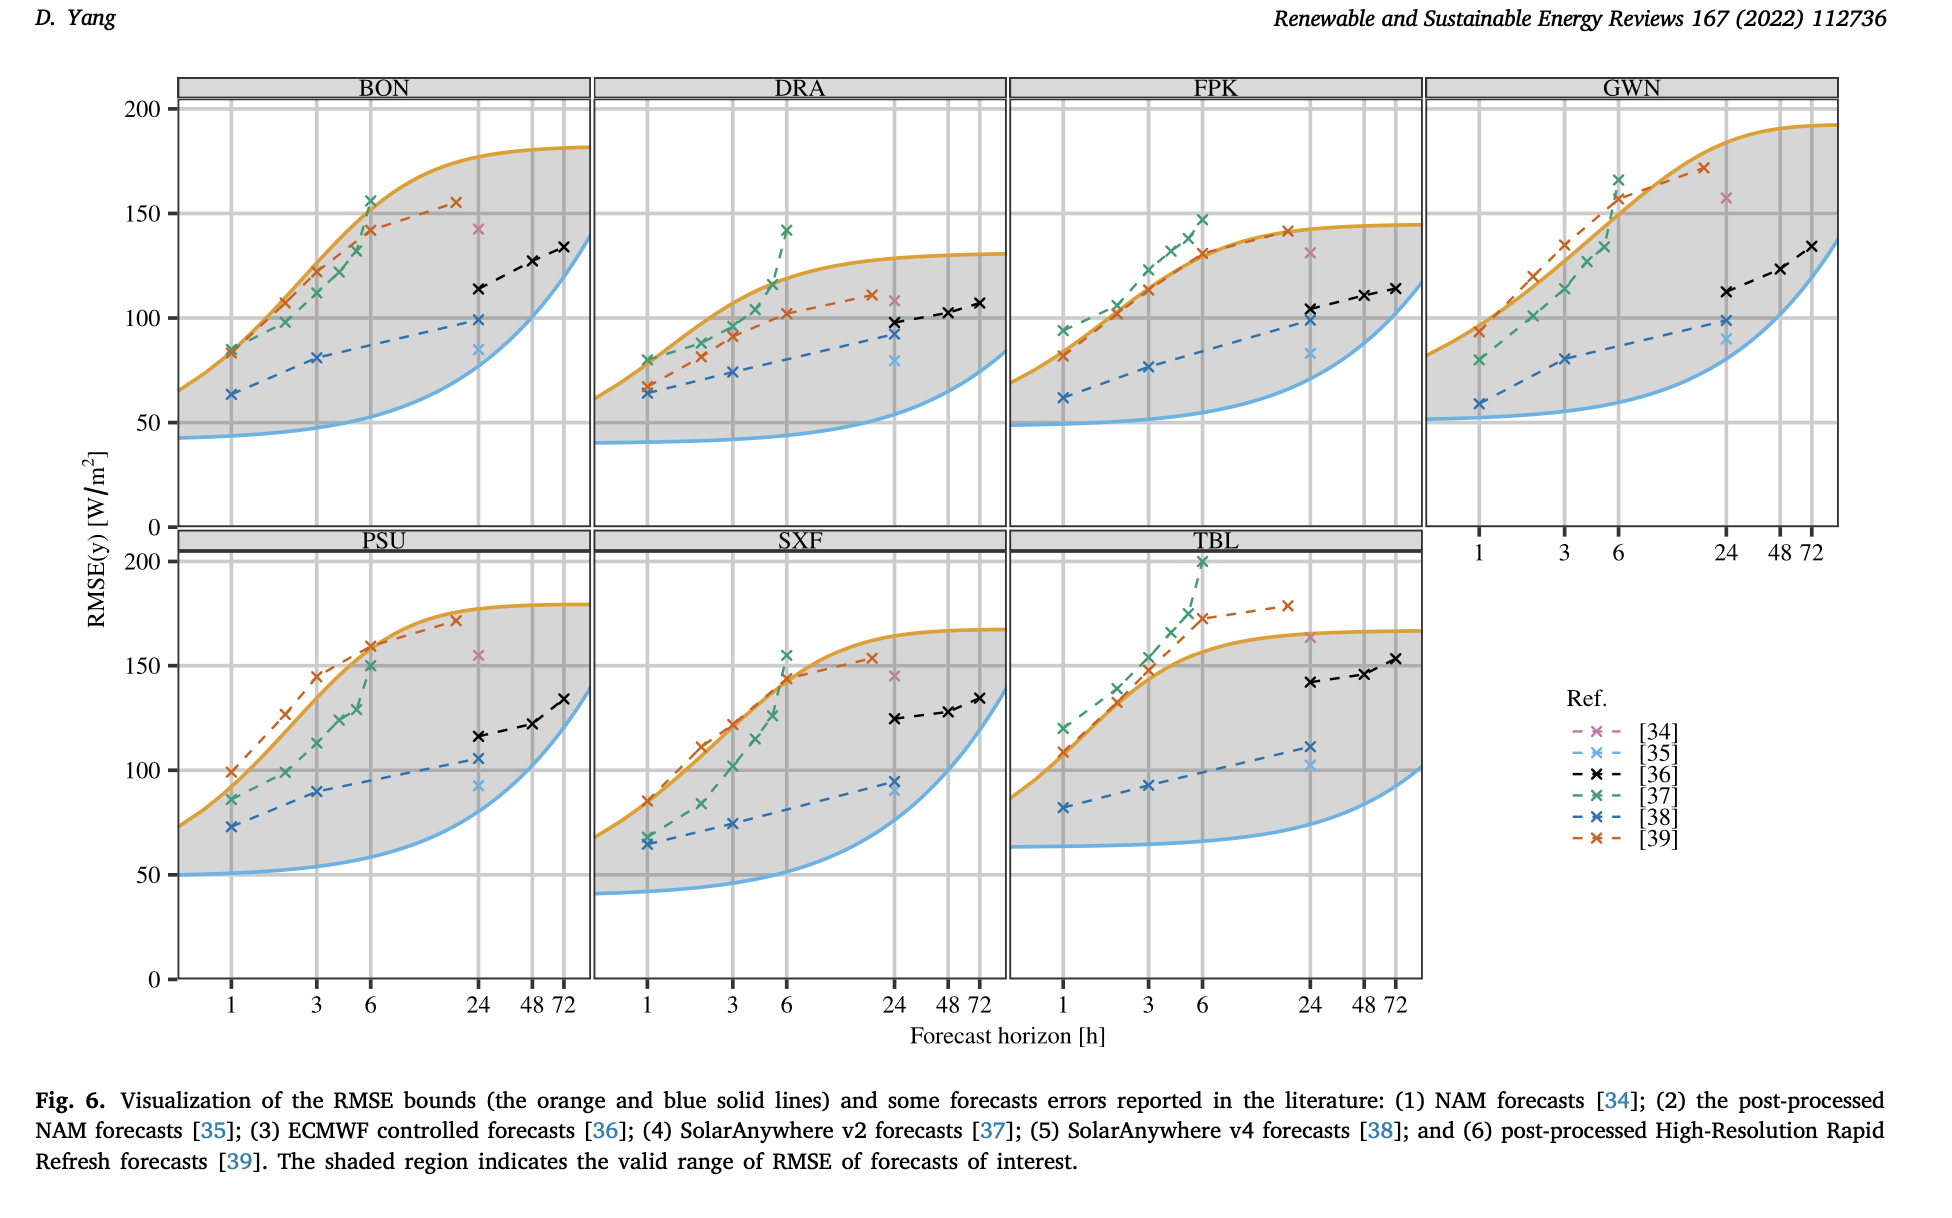

In [116]:
from IPython.display import Image
display(Image(filename='../figures/resultats_yang.png',width=800, height=1500))



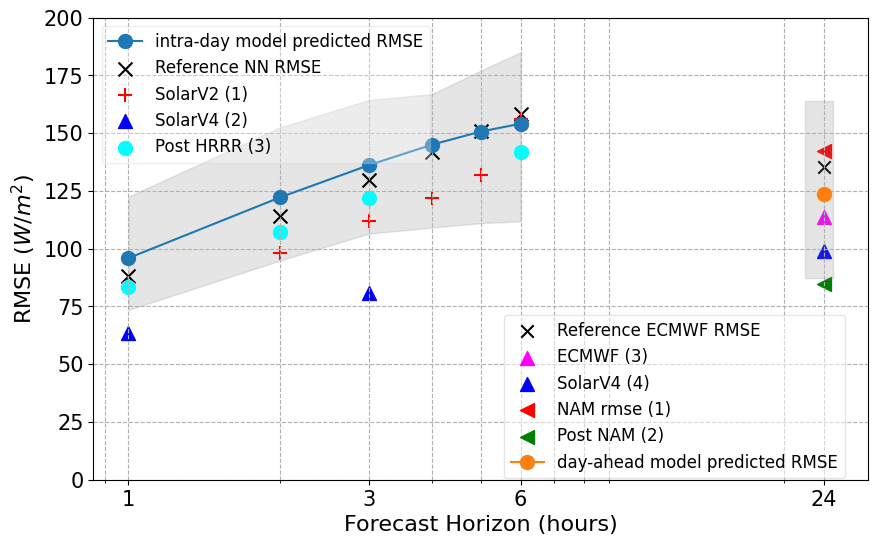

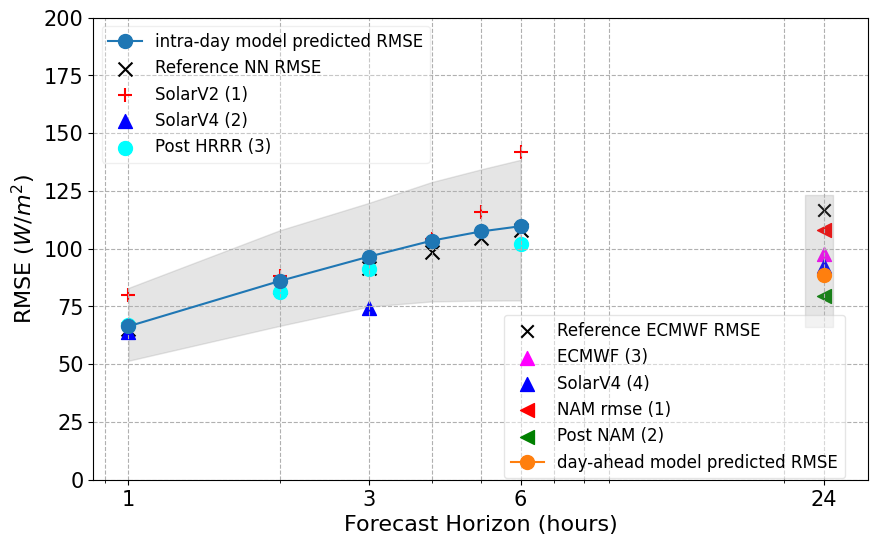

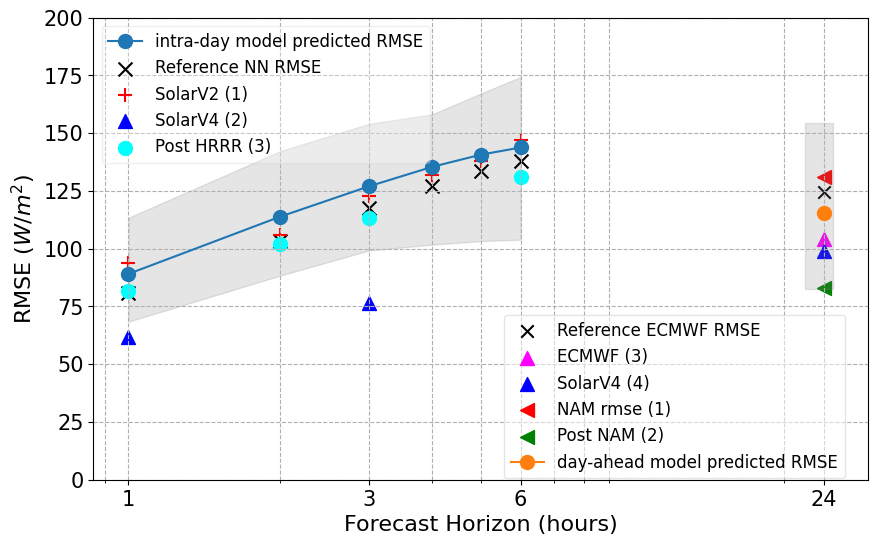

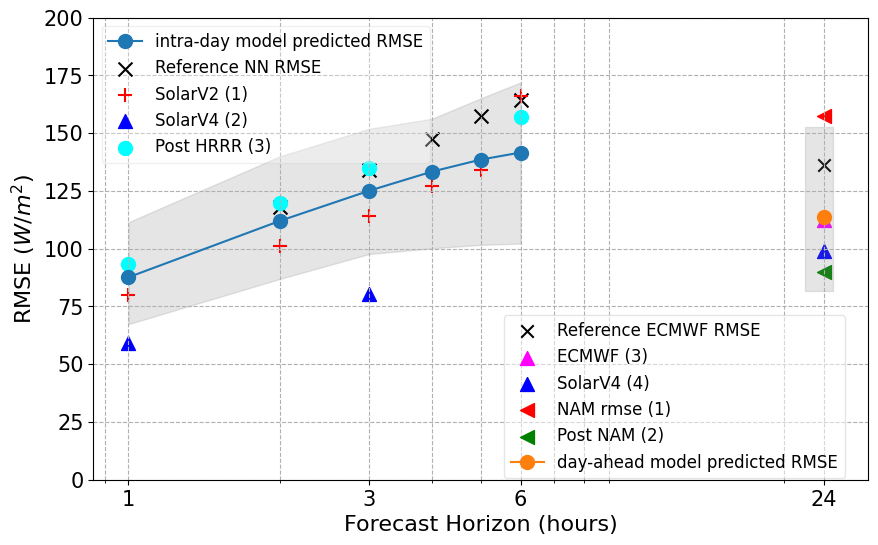

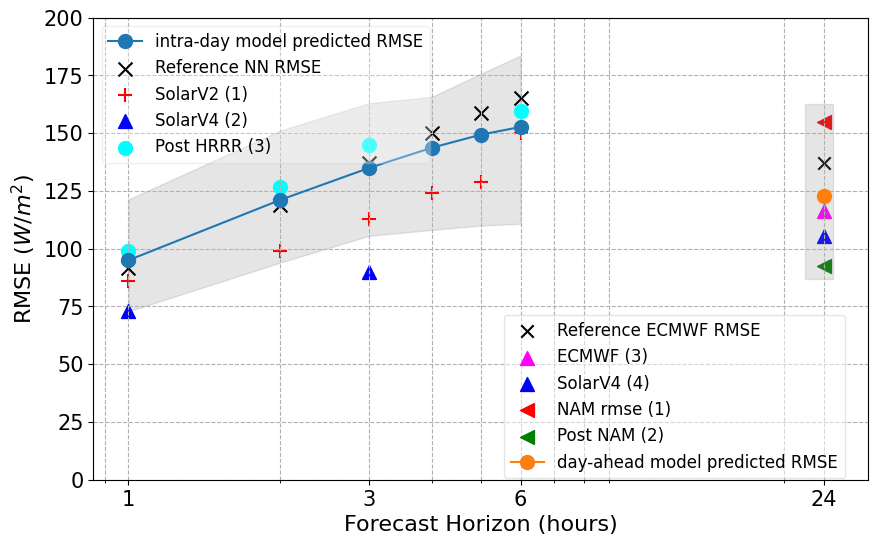

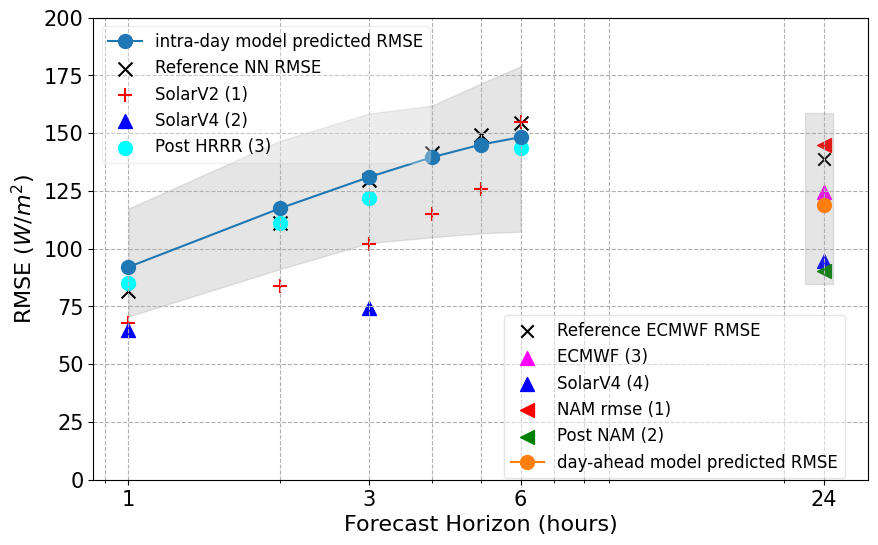

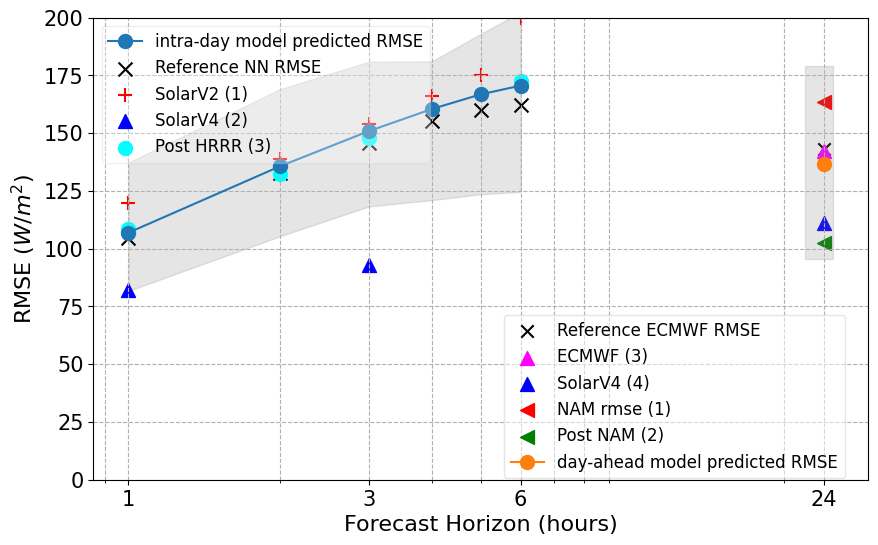

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import LogLocator, NullFormatter, ScalarFormatter
# Plot the intra-day and day-ahead predictions results
# Load the CSV files
file_path_v = '../data/predictions_ID_models.csv'
file_path_d24 = '../data/predictions_D24_model.csv'
v_data = pd.read_csv(file_path_v)
d24_data = pd.read_csv(file_path_d24)

# Load Perez's intra-day results
# Perez et al, 2010
file_path = '../data/results_perez2010_h.csv'
pr1_data = pd.read_csv(file_path)
# Perez et al, 2018
file_path = '../data/results_perez2018_h.csv'
pr2_data = pd.read_csv(file_path)
# Load Zhang's results
# Zhang et al, 2022
file_path = '../data/results_zhang2022_h.csv'
zh_data = pd.read_csv(file_path)

columns_to_process = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6']

# Compute the new columns using a for loop
for col in columns_to_process:
    v_data[f'{col}_pr1'] = pr1_data[col]
    v_data[f'{col}_pr2'] = pr2_data[col]
    v_data[f'{col}_zh'] = zh_data[col]


v_data['meanO_pr1_h'] = pr1_data['meanObs']
v_data['meanO_pr2_h'] = pr2_data['meanObs']
v_data['meanO_zh'] = zh_data['meanObs']


# Add day-ahead RMSE data
# Load Perez's results
# Perez et al, 2013
file_path = '../data/results_perez2013_d.csv'
pr1_data = pd.read_csv(file_path)
# Perez et al, 2018
file_path = '../data/results_perez2018_d.csv'
pr2_data = pd.read_csv(file_path)
# Load Yang's results
# Yang et al, 2019a
file_path = '../data/results_yang2019a_d.csv'
dy1_data = pd.read_csv(file_path)
# Yang et al, 2019b
file_path = '../data/results_yang2019b_d.csv'
dy2_data = pd.read_csv(file_path)

v_data['D24_pr1'] = pr1_data['D24']
v_data['D24_pr2'] = pr2_data['D24']
v_data['D24_dy1'] = dy1_data['D24']
v_data['D24_dy2'] = dy2_data['D24']

v_data['meanO_pr1_d'] = pr1_data['meanObs']
v_data['meanO_pr2_d'] = pr2_data['meanObs']
v_data['meanO_dy1'] = dy1_data['meanObs']
v_data['meanO_dy2'] = dy2_data['meanObs']

v_data['D24_50'] = d24_data['D24_50']
v_data['D24'] = d24_data['D24']
v_data['D24_2_5'] = d24_data['D24_2_5']
v_data['D24_97_5'] = d24_data['D24_97_5']
v_data['IFS'] = d24_data['IFS']
v_data['IFSr'] = d24_data['IFSr']

# Define the horizons
horizons = ['1h', '2h', '3h', '4h', '5h', '6h']
hours = ['1', '2', '3', '4', '5', '6']



def plot_combined_rmse(site_data, site_name, model):
    forecast_horizons = list(range(1, 7))  # 1h to 6h
    day_ahead_horizon = np.array([24])  # 24h
    # intra-day
    reg_rmse = np.array([site_data[f'{model}_{h}'].values[0] for h in horizons])
    lower_bound = np.array([site_data[f'{model}_{h}_2_5'].values[0] for h in horizons])
    upper_bound = np.array([site_data[f'{model}_{h}_97_5'].values[0] for h in horizons])
    effective_rmse = [site_data[f'N{h}'].values[0] for h in hours]
    perez_rmse = [site_data[f'H{h}_pr1'].values[0] for h in hours]
    zhang_rmse = [site_data[f'H{h}_zh'].values[0] for h in hours]
    perez2_rmse = [site_data[f'H{h}_pr2'].values[0] for h in hours]
    
    # Day-ahead data
    effective_ifs_rmse = site_data['IFS'].values[0]
    perez_da_rmse_1 = site_data['D24_pr1'].values[0]
    perez_da_rmse_2 = site_data['D24_pr2'].values[0]
    yang_da_rmse_1 = site_data['D24_dy1'].values[0]
    yang_da_rmse_2 = site_data['D24_dy2'].values[0]
    d24_reg_rmse = site_data['D24'].values[0]
    lower_d24_bound = site_data['D24_2_5'].values[0]
    upper_d24_bound = site_data['D24_97_5'].values[0]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    intra_day_handle, = ax.plot(forecast_horizons, reg_rmse, marker='o',markersize=10, label='intra-day model predicted RMSE')
    ax.fill_between(forecast_horizons, lower_bound, upper_bound, color='gray', alpha=0.2, label='95% Prediction Interval')
    effective_rmse_handle = ax.scatter(forecast_horizons, effective_rmse, marker='x', color='black', label='Reference NN RMSE',s=100)
    perez_rmse_handle = ax.scatter(forecast_horizons, perez_rmse, marker='+', color='red', label='SolarV2 (1)',s=100)
    perez2_rmse_handle = ax.scatter(forecast_horizons, perez2_rmse, marker='^', color='blue', label='SolarV4 (2)',s=100)
    zhang_rmse_handle = ax.scatter(forecast_horizons, zhang_rmse, marker='o', color='cyan', label='Post HRRR (3)',s=100)
    
    # Adding the day-ahead data
    effective_ifs_rmse_handle = ax.scatter(day_ahead_horizon, effective_ifs_rmse, marker='x', color='black', label='Reference ECMWF RMSE', s=80)
    perez_da_rmse_1_handle = ax.scatter(day_ahead_horizon, perez_da_rmse_1, marker='^', color='magenta', label='ECMWF (3)', s=100)
    perez_da_rmse_2_handle = ax.scatter(day_ahead_horizon, perez_da_rmse_2, marker='^', color='blue', label='SolarV4 (4)', s=100)
    yang_da_rmse_1_handle = ax.scatter(day_ahead_horizon, yang_da_rmse_1, marker='<', color='red', label='NAM rmse (1)', s=100)
    yang_da_rmse_2_handle = ax.scatter(day_ahead_horizon, yang_da_rmse_2, marker='<', color='green', label='Post NAM (2)', s=100)
    d24_reg_rmse_handle, = ax.plot(day_ahead_horizon, [d24_reg_rmse], marker='o' ,markersize=10,label='day-ahead model predicted RMSE')

    # Extend the horizon for the shaded area
    extended_horizon = np.array([22, 23, 24, 25])
    lower_extended = np.repeat(lower_d24_bound, len(extended_horizon))
    upper_extended = np.repeat(upper_d24_bound, len(extended_horizon))
    ax.fill_between(extended_horizon, lower_extended, upper_extended, color='gray', alpha=0.2)
    
    # Intra-day legend
    intra_day_handles = [intra_day_handle, effective_rmse_handle, perez_rmse_handle, perez2_rmse_handle, zhang_rmse_handle]
    intra_day_labels = [h.get_label() for h in intra_day_handles]
    intra_day_legend = ax.legend(handles=intra_day_handles, labels=intra_day_labels, loc='upper left',fontsize=12,framealpha=0.3)


    # Day-ahead legend
    day_ahead_handles = [effective_ifs_rmse_handle, perez_da_rmse_1_handle, perez_da_rmse_2_handle, yang_da_rmse_1_handle, yang_da_rmse_2_handle, d24_reg_rmse_handle]
    day_ahead_labels = [h.get_label() for h in day_ahead_handles]
    day_ahead_legend = ax.legend(handles=day_ahead_handles, labels=day_ahead_labels, loc='center', bbox_to_anchor=(0.75, 0.18),fontsize=12,framealpha=0.5)

    # Add both legends to the plot
    ax.add_artist(intra_day_legend)
    ax.set_xscale('log')
    ax.set_xlabel('Forecast Horizon (hours)',fontsize=16)
    ax.set_ylabel('RMSE $(W/m^2)$',fontsize=16)
    #ax.set_title(f'Intra-day and day-ahead RMSE vs Forecast Horizon for {site_name}')
    ax.grid(True, which="both", ls="--")
    ax.set_ylim(0, 200)

    # Set x-axis ticks
    ax.xaxis.set_major_locator(LogLocator(base=10.0, numticks=25))
    ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=50))
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.set_xticks([1, 3, 6, 24])
    ax.set_xticklabels(['1', '3', '6', '24'])
    ax.tick_params(axis='x', labelsize=15)  # Increase the size of x-tick labels
    ax.tick_params(axis='y', labelsize=15)  # Increase the size of y-tick labels

    
    plt.savefig(f'../figures/rmse_vs_horizon_{site_name}.png', format='png')
    plt.show()

def plot_combined_relative_rmse(site_data, site_name, model):
    forecast_horizons = list(range(1, 7))  # 1h to 6h
    day_ahead_horizon = np.array([24])  # 24h
    
    reg_rmse = np.array([site_data[f'{model}_{h}'].values[0] for h in horizons])
    lower_bound = np.array([site_data[f'{model}_{h}_2_5'].values[0] for h in horizons])
    upper_bound = np.array([site_data[f'{model}_{h}_97_5'].values[0] for h in horizons])
    
    reg_rrmse = reg_rmse / site_data['meanObs'].values[0] * 100 
    lower_rbound = lower_bound / site_data['meanObs'].values[0] * 100  
    upper_rbound = upper_bound / site_data['meanObs'].values[0] * 100  
    effective_rrmse = [site_data[f'N{h}r'].values[0] for h in hours]
    
    perez_rrmse = [site_data[f'H{h}_pr1'].values[0] / site_data['meanO_pr1_h'].values[0] * 100 for h in hours]
    zhang_rrmse = [site_data[f'H{h}_zh'].values[0] / site_data['meanO_zh'].values[0] * 100 for h in hours]
    perez2_rrmse = [site_data[f'H{h}_pr2'].values[0] / site_data['meanO_pr2_h'].values[0] * 100 for h in hours]
   
    # Day-ahead data
    effective_ifs_rrmse = np.array([site_data['IFSr'].values[0]])
    perez_da_rrmse_1 = np.array([site_data['D24_pr1'].values[0] / site_data['meanO_pr1_d'].values[0] * 100])
    perez_da_rrmse_2 = np.array([site_data['D24_pr2'].values[0] / site_data['meanO_pr2_d'].values[0] * 100])
    yang_da_rrmse_1 = np.array([site_data['D24_dy1'].values[0] / site_data['meanO_dy1'].values[0] * 100])
    yang_da_rrmse_2 = np.array([site_data['D24_dy2'].values[0] / site_data['meanO_dy2'].values[0] * 100])
    d24_reg_rrmse = np.array([site_data['D24'].values[0]]) / site_data['meanObs'].values[0] * 100 
    lower_d24_rbound = np.array([site_data['D24_2_5'].values[0]]) / site_data['meanObs'].values[0] * 100 
    upper_d24_rbound = np.array([site_data['D24_97_5'].values[0]]) / site_data['meanObs'].values[0] * 100 
    
    fig, ax = plt.subplots(figsize=(10, 6))
    intra_day_handle, = ax.plot(forecast_horizons, reg_rrmse, marker='o', label='Intra-day model predicted RMSE')
    ax.fill_between(forecast_horizons, lower_rbound, upper_rbound, color='gray', alpha=0.2, label='95% Prediction Interval')
    effective_rrmse_handle = ax.scatter(forecast_horizons, effective_rrmse, marker='x', color='red', label='effective RMSE')
    perez_rrmse_handle = ax.scatter(forecast_horizons, perez_rrmse, marker='+', color='black', label='SolarV2 [37]')
    perez2_rrmse_handle = ax.scatter(forecast_horizons, perez2_rrmse, marker='^', color='blue', label='SolarV4 [38]')
    zhang_rrmse_handle = ax.scatter(forecast_horizons, zhang_rrmse, marker='o', color='cyan', label='Post HRRR[39]')
    
    # Adding the day-ahead data
    effective_ifs_rrmse_handle = ax.scatter(day_ahead_horizon, effective_ifs_rrmse, marker='x', color='black', label='Reference ECMWF rmse', s=50)
    perez_da_rrmse_1_handle = ax.scatter(day_ahead_horizon, perez_da_rrmse_1, marker='^', color='magenta', label='ECMWF [36]', s=50)
    perez_da_rrmse_2_handle = ax.scatter(day_ahead_horizon, perez_da_rrmse_2, marker='^', color='cyan', label='SolarV4 [38]', s=50)
    yang_da_rrmse_1_handle = ax.scatter(day_ahead_horizon, yang_da_rrmse_1, marker='<', color='red', label='NAM rmse [34]', s=50)
    yang_da_rrmse_2_handle = ax.scatter(day_ahead_horizon, yang_da_rrmse_2, marker='<', color='green', label='Post NAM [35]', s=50)
    d24_reg_rrmse_handle, = ax.plot(day_ahead_horizon, [d24_reg_rrmse], marker='o', label='Day ahead model predicted rRMSE')
    
    extended_horizon = np.array([22, 23, 24, 25])
    lower_extended = np.repeat(lower_d24_rbound, len(extended_horizon))
    upper_extended = np.repeat(upper_d24_rbound, len(extended_horizon))
    ax.fill_between(extended_horizon, lower_extended, upper_extended, color='gray', alpha=0.2)
    
    # Intra-day legend
    intra_day_handles = [intra_day_handle, effective_rrmse_handle, perez_rrmse_handle, perez2_rrmse_handle, zhang_rrmse_handle]
    intra_day_labels = [h.get_label() for h in intra_day_handles]
    intra_day_legend = ax.legend(handles=intra_day_handles, labels=intra_day_labels, loc='upper left')
    
    # Day-ahead legend
    day_ahead_handles = [effective_ifs_rrmse_handle, perez_da_rrmse_1_handle, perez_da_rrmse_2_handle, yang_da_rrmse_1_handle, yang_da_rrmse_2_handle, d24_reg_rrmse_handle]
    day_ahead_labels = [h.get_label() for h in day_ahead_handles]
    day_ahead_legend = ax.legend(handles=day_ahead_handles, labels=day_ahead_labels, loc='center', bbox_to_anchor=(0.75, 0.15))

    # Add both legends to the plot
    ax.add_artist(intra_day_legend)

    ax.set_xscale('log')
    ax.set_xlabel('Forecast Horizon (hours)')
    ax.set_ylabel('rRMSE (%)')
    ax.set_title(f'Intra-day and day-aheadr RMSE vs Forecast Horizon for {site_name}')
    ax.grid(True, which="both", ls="--")
    ax.set_ylim(0, 50)

    # Set x-axis ticks
    ax.xaxis.set_major_locator(LogLocator(base=10.0, numticks=25))
    ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=50))
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.set_xticks([1, 3, 6, 24])
    ax.set_xticklabels(['1', '3', '6', '24'])

    plt.show()

# Loop over each site and plot the RMSE vs forecast horizon for NN model
grouped = v_data.groupby('Site')
model = 'NN'
for site_name, site_data in grouped:
    plot_combined_rmse(site_data, site_name, model)
    #plot_combined_relative_rmse(site_data, site_name, model)


In [87]:
import pandas as pd

# Predictions on insular sites
file_path_m = '../data/data_Mazorra2016.csv'
file_path_l = '../data/data_lauret2015.csv'
m_data = pd.read_csv(file_path_m)
l_data = pd.read_csv(file_path_l)
# Concatenate DataFrames vertically
v_data = pd.concat([m_data, l_data], axis=0, ignore_index=True)


v_data.head()
# Define a dictionary of models for each horizon
models = {
    'NN_1h': {
        '2.5%': lambda x: -5.68 + 416.46 * x,  # Example coefficients, replace with effective values
        '50%': lambda x: -14.89 + 573.37 * x,  # Example coefficients, replace with effective values
        '97.5%': lambda x: -19.56 + 747.18 * x,  # Example coefficients, replace with effective values
        'regression': lambda x: 558.43 * x -10.28  # Example coefficients, replace with effective values
    },


    'NN_2h': {
        '2.5%': lambda x: -6.71 + 534.16 * x,  # Example coefficients, replace with effective values
        '50%': lambda x: -20.08 + 749.78 * x,  # Example coefficients, replace with effective values
        '97.5%': lambda x: -7.40 + 840.77 * x,  # Example coefficients, replace with effective values
        'regression': lambda x:  683.69 * x -7.80 # Example coefficients, replace with effective values
    },
   
    'NN_3h': {
        '2.5%': lambda x: -7.04 + 597.18* x,  # Example coefficients, replace with effective values
        '50%': lambda x:  -16.93 + 822.04 * x,  # Example coefficients, replace with effective values
        '97.5%': lambda x: 4.26 + 841.74 * x,  # Example coefficients, replace with effective values
        'regression': lambda x:  748.57 * x -6.21  # Example coefficients, replace with effective values
    },

    'NN_4h': {
        '2.5%': lambda x: -5.77 + 604.18 * x,  # Example coefficients, replace with effective values
        '50%': lambda x: -19.54  + 894.35 * x,  # Example coefficients, replace with effective values
        '97.5%': lambda x: 30.09 + 719.43 * x,  # Example coefficients, replace with effective values
        'regression': lambda x:  785.03 * x -4.30  # Example coefficients, replace with effective values
    },

    'NN_5h': {
        '2.5%': lambda x: -9.50 + 633.91* x,  # Example coefficients, replace with effective values
        '50%': lambda x:-14.51 +  877.08 * x,  # Example coefficients, replace with effective values
        '97.5%': lambda x: 23.34 + 808.20 * x,  # Example coefficients, replace with effective values
        'regression': lambda x:  817.80 * x -4.84 # Example coefficients, replace with effective values
    }, 

    'NN_6h': {
        '2.5%': lambda x: -11.29 + 647.41 * x,
        '50%': lambda x: -16.09 + 898.13 * x,
        '97.5%': lambda x: 17.58 + 880.59* x,
        'regression': lambda x: 838.37 * x -5.37
    }
    
}
# Create predictions file
# 
#o_data = pd.DataFrame(columns=columns)
columns = ['Site', 'meanObs', 'stddeltakc']
o_data = pd.DataFrame(columns=columns)
o_data['Site'] = v_data['Site']
o_data['meanObs'] = v_data['meanObs']
o_data['stddeltakc'] = v_data['stddeltakc']


    
# Loop through each horizon and apply the models
for horizon, model_funcs in models.items():
    o_data[f'{horizon}_2_5'] = v_data['stddeltakc'].apply(model_funcs['2.5%'])
    o_data[f'{horizon}_50'] = v_data['stddeltakc'].apply(model_funcs['50%'])
    o_data[f'{horizon}'] = v_data['stddeltakc'].apply(model_funcs['regression'])
    o_data[f'{horizon}_97_5'] = v_data['stddeltakc'].apply(model_funcs['97.5%'])

# Save the updated DataFrame to a new CSV file
output_file_path = '../data/predictions_insular_sites.csv'
o_data.to_csv(output_file_path, index=False)
print(f"Predictions saved to {output_file_path}")
o_data.head()

Predictions saved to ../data1/predictions_insular_sites.csv


Site   meanObs  stddeltakc  NN_1h_2_5    NN_1h_50       NN_1h  NN_1h_97_5  \
0  LAS  433.7852      0.1752  67.283792   85.564424   87.556936  111.345936   
1  POZ  543.4537      0.1411  53.082506   66.012507   68.514473   85.867098   
2  AJA  428.5300      0.1943  75.238178   96.515791   98.222949  125.617074   
3  RAI  480.0600      0.2377  93.312542  121.400049  122.458811  158.044686   
4  SPI  535.0600      0.1885  72.822710   93.190245   94.984055  121.283430   

    NN_2h_2_5    NN_2h_50       NN_2h  ...       NN_4h  NN_4h_97_5  \
0   86.874832  111.281456  111.982488  ...  133.237256  156.134136   
1   68.659976   85.713958   88.668659  ...  106.467733  131.601573   
2   97.077288  125.602254  125.040967  ...  148.231329  169.875249   
3  120.259832  158.142706  154.713113  ...  182.301631  201.098511   
4   93.979160  121.253530  121.075565  ...  143.678155  165.702555   

    NN_5h_2_5    NN_5h_50      NN_5h  NN_5h_97_5   NN_6h_2_5    NN_6h_50  \
0  101.561032  139.154416  138.43856   164.93664  102.136232  141.262376   
1   79.944701  109.245988  110.55158   137.37702   80.059551  110.636143   
2  113.668713  155.906644  154.05854   180.37326  114.501763  158.416659   
3  141.180407  193.971916  189.55106   215.44914  142.599357  197.395501   
4  109.992035  150.819580  149.31530   175.68570  110.746785  153.207505   

        NN_6h  NN_6h_97_5  
0  141.512424  171.859368  
1  112.924007  141.831249  
2  157.525291  188.678637  
3  193.910549  226.896243  
4  152.662745  183.571215  

[5 rows x 27 columns]

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the CSV files
file_path_m = '../data/results_Mazorra2016_h.csv'
file_path_l = '../data/results_lauret2015GP_h.csv'
m_data = pd.read_csv(file_path_m)
l_data = pd.read_csv(file_path_l)
# Concatenate DataFrames vertically
ml_data = pd.concat([m_data, l_data], axis=0, ignore_index=True)

# Load the CSV file
file_path = '../data/predictions_insular_sites.csv'
v_data = pd.read_csv(file_path)


columns_to_process = ['H1','H2','H3','H4','H5','H6']

# Compute the new columns using a for loop
for col in columns_to_process:
    v_data[f'{col}_ml'] = ml_data[col]
    
v_data['meanO_ml'] = ml_data['meanObs']

v_data.head()          
                 

Site   meanObs  stddeltakc  NN_1h_2_5    NN_1h_50       NN_1h  NN_1h_97_5  \
0  LAS  433.7852      0.1752  67.283792   85.564424   87.556936  111.345936   
1  POZ  543.4537      0.1411  53.082506   66.012507   68.514473   85.867098   
2  AJA  428.5300      0.1943  75.238178   96.515791   98.222949  125.617074   
3  RAI  480.0600      0.2377  93.312542  121.400049  122.458811  158.044686   
4  SPI  535.0600      0.1885  72.822710   93.190245   94.984055  121.283430   

    NN_2h_2_5    NN_2h_50       NN_2h  ...    NN_6h_50       NN_6h  \
0   86.874832  111.281456  111.982488  ...  141.262376  141.512424   
1   68.659976   85.713958   88.668659  ...  110.636143  112.924007   
2   97.077288  125.602254  125.040967  ...  158.416659  157.525291   
3  120.259832  158.142706  154.713113  ...  197.395501  193.910549   
4   93.979160  121.253530  121.075565  ...  153.207505  152.662745   

   NN_6h_97_5     H1_ml     H2_ml     H3_ml     H4_ml     H5_ml     H6_ml  \
0  171.859368  104.7500  134.3700  142.8200  145.4100  147.3100  147.8800   
1  141.831249   84.0000  106.1700  110.5100  114.9300  118.8900  120.4300   
2  188.678637   84.4633  108.5895  125.9878  131.8158  137.0010  144.8003   
3  226.896243  124.5756  151.4109  162.6443  166.7248  170.0373  169.7492   
4  183.571215  112.7371  142.8610  156.8261  165.2800  168.9184  169.5070   

   meanO_ml  
0  433.7852  
1  543.4537  
2  428.5300  
3  480.0600  
4  535.0600  

[5 rows x 34 columns]

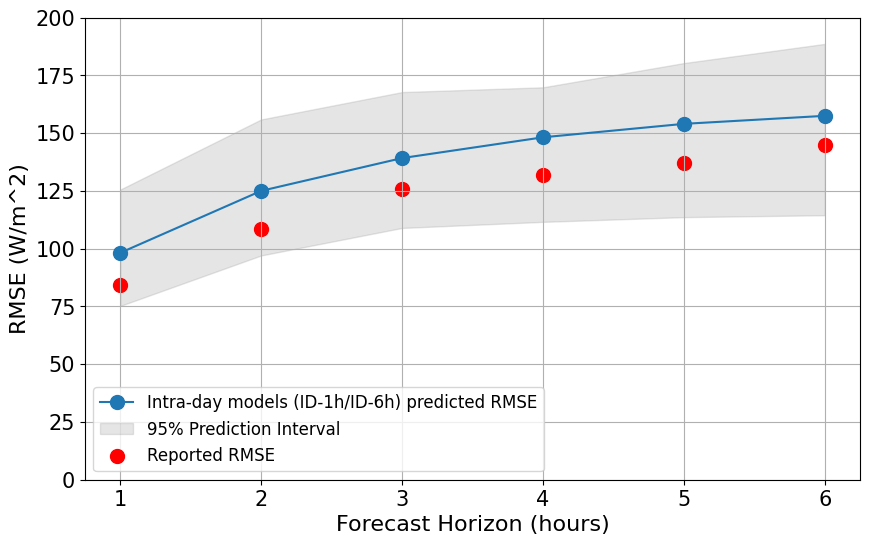

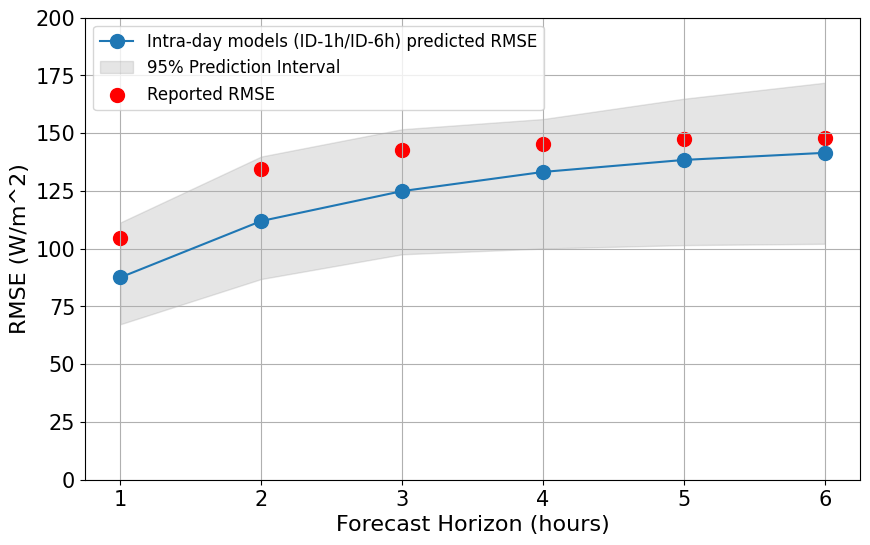

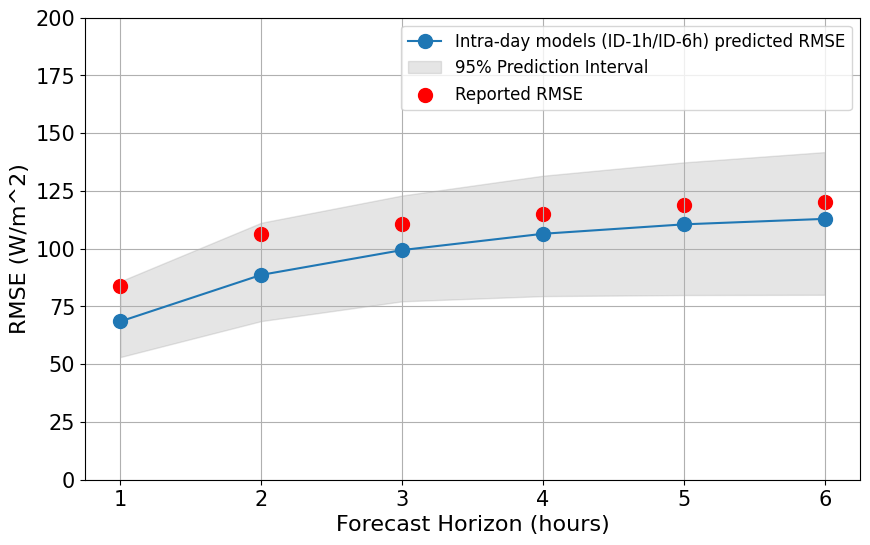

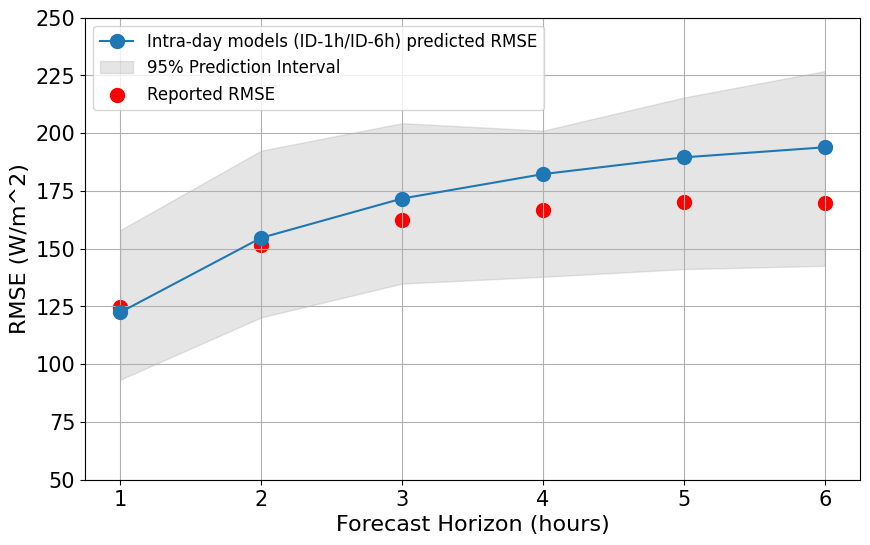

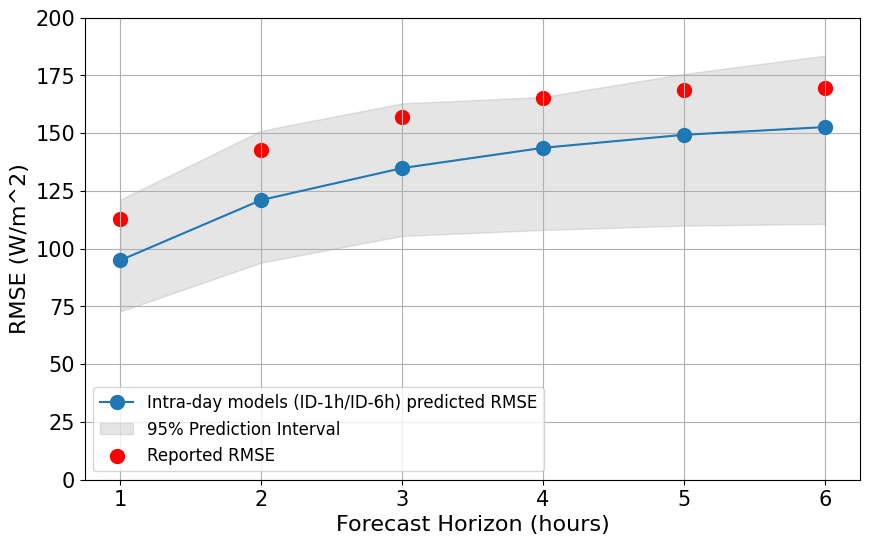

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Plot results for insular sites
# Load Mazorra's results
# Perez et al, 2010
# Load the CSV files
file_path_m = '../data/results_Mazorra2016_h.csv'
file_path_l = '../data/results_lauret2015GP_h.csv'
m_data = pd.read_csv(file_path_m)
l_data = pd.read_csv(file_path_l)
# Concatenate DataFrames vertically
ml_data = pd.concat([m_data, l_data], axis=0, ignore_index=True)

# Load the CSV file
file_path = '../data/predictions_insular_sites.csv'
v_data = pd.read_csv(file_path)


columns_to_process = ['H1','H2','H3','H4','H5','H6']

# Compute the new columns using a for loop
for col in columns_to_process:
    v_data[f'{col}_ml'] = ml_data[col]
    
v_data['meanO_ml'] = ml_data['meanObs']

  

# Define the horizons
horizons = ['1h', '2h', '3h', '4h', '5h', '6h']
# Define hours
hours = ['1', '2', '3', '4', '5', '6']

# Define a function to plot the RMSE of the median vs the forecast horizon
def plot_rmse_vs_horizon(site_data, site_name, model):
    forecast_horizons = list(range(1, 7))  # 1h to 6h
    #median_rmse = [site_data[f'{model}_{h}_50'].values[0] for h in horizons]
    reg_rmse = np.array([site_data[f'{model}_{h}'].values[0] for h in horizons])
    lower_bound = np.array([site_data[f'{model}_{h}_2_5'].values[0]  for h in horizons])
    upper_bound = np.array([site_data[f'{model}_{h}_97_5'].values[0]  for h in horizons])
    
    ml_rmse =  [site_data[f'H{h}_ml'].values[0] for h in hours]

    
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_horizons, reg_rmse, marker='o', markersize=10,label='Intra-day models (ID-1h/ID-6h) predicted RMSE')
    plt.fill_between(forecast_horizons, lower_bound, upper_bound, color='gray', alpha=0.2, label='95% Prediction Interval')
    #plt.errorbar(forecast_horizons, median_rmse, yerr=[median_rmse - lower_bound, upper_bound - median_rmse], fmt='o', capsize=5)
    plt.scatter(forecast_horizons, ml_rmse, marker='o',s=100,color='red',label='Reported RMSE')

    # Define y-axis limits
    plt.ylim(0, 200)  # Set your desired y-axis limits here
    if site_name == 'RAI' :
        plt.ylim(50, 250)
    plt.xlabel('Forecast Horizon (hours)',fontsize=16)
    plt.ylabel('RMSE (W/m^2)',fontsize=16)
    #plt.title(f'{model} RMSE vs Forecast Horizon for {site_name}')
    plt.xticks( fontsize=15)  # Increase the size of x-tick labels
    plt.yticks( fontsize=15)  # Increase the size of y-tick labels
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.savefig(f'../figures/intra_day_rmse_{site_name}.png', format='png')
    plt.show()
    
# relative RMSE
def plot_relative_rmse_vs_horizon(site_data, site_name, model):
    forecast_horizons = list(range(1, 7))  # 1h to 6h
    #median_rmse = [site_data[f'{model}_{h}_50'].values[0] for h in horizons]
    
    reg_rmse = np.array([site_data[f'{model}_{h}'].values[0] for h in horizons])
    lower_bound = np.array([site_data[f'{model}_{h}_2_5'].values[0]  for h in horizons])
    upper_bound = np.array([site_data[f'{model}_{h}_97_5'].values[0]  for h in horizons])
    
    
    # Calculate rRMSE
    
    mean_obs = site_data['meanObs'].values[0]
    reg_rrmse = (reg_rmse / mean_obs) * 100
    lower_rbound = (lower_bound / mean_obs) * 100
    upper_rbound = (upper_bound / mean_obs) * 100
    
    ml_rmse =  [site_data[f'H{h}_ml'].values[0] for h in hours]


    ml_rrmse = (ml_rmse / site_data['meanO_ml'].values[0]) * 100
    
    plt.figure(figsize=(10, 6))
    plt.plot(forecast_horizons, reg_rrmse, marker='o', label=f'{model} predicted rRMSE')
    plt.scatter(forecast_horizons, ml_rrmse, marker='+',color='black',label='Reported rRMSE')
    
    plt.fill_between(forecast_horizons, lower_rbound, upper_rbound, color='gray', alpha=0.2, label='95% Prediction Interval')
    #plt.errorbar(forecast_horizons, median_rmse, yerr=[median_rmse - lower_bound, upper_bound - median_rmse], fmt='o', capsize=5)
    plt.ylim(0, 50)  # Set your desired y-axis limits here
    plt.xlabel('Forecast Horizon (hours)')
    plt.ylabel('rRMSE (%)')
    plt.title(f'{model} rRMSE vs Forecast Horizon for {site_name}')
    plt.legend()
    plt.grid(True)
    plt.show()
# Loop over each site and plot the RMSE vs forecast horizon for NN model
grouped = v_data.groupby('Site')
model = 'NN'
for site_name, site_data in grouped:
    plot_rmse_vs_horizon(site_data, site_name, model)
    #plot_relative_rmse_vs_horizon(site_data, site_name, model)

